In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

from processing_functions import *

random_state= 42

pd.set_option('display.max_rows', 150)
pd.set_option('display.max_colwidth', None)  # Show full strings in columns

X_trainval, y_trainval, X_test, description, description_X_trainval, numerical_vars, cat_vars, binary_vars = load_data()

print("# training+validation obs: ", X_trainval.shape[0])
print("# test obs: ", X_test.shape[0])
print("# features", X_test.shape[1])

/Users/fdd838/Library/CloudStorage/OneDrive-Sky/Desktop/personal/home-credit-default-risk/processing_functions.py:38: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['CODE_GENDER'] = X['CODE_GENDER'].replace({'M': 1, 'F': 0, 'XNA': np.nan})
/Users/fdd838/Library/CloudStorage/OneDrive-Sky/Desktop/personal/home-credit-default-risk/processing_functions.py:38: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['CODE_GENDER'] = X['CODE_GENDER'].replace({'M': 1, 'F': 0, 'XNA': np.nan})


# training+validation obs:  307511
# test obs:  48744
# features 120


In [2]:
print(description[description.Feature=='TARGET'].Description.values[0])
vc = y_trainval.value_counts(dropna=False)
pct = (vc / len(y_trainval)) * 100
display(pd.DataFrame({'count': vc, 'percent': pct.round(2)}))

Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)


,count,percent
TARGET,,
0,282686,91.93
1,24825,8.07


In [3]:
display(description_X_trainval.TYPE.value_counts())
description_X_trainval.to_csv("data/preprocessed/description_training_set.csv", index=False)
description_X_trainval#.sort_values(['TYPE', 'NaN count'], ascending=[True, False])

TYPE
NUMERIC        73
BINARY         35
CATEGORICAL    12
Name: count, dtype: int64

,Feature,Description,Special,dtype,TYPE,nunique,NaN count,NaN %
0,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,,int64,BINARY,2,0,0.00
1,CODE_GENDER,Gender of the client,,float64,NUMERIC,2,4,0.00
2,FLAG_OWN_CAR,Flag if the client owns a car,,int64,BINARY,2,0,0.00
3,FLAG_OWN_REALTY,Flag if client owns a house or flat,,int64,BINARY,2,0,0.00
4,CNT_CHILDREN,Number of children the client has,,int64,NUMERIC,15,0,0.00
5,AMT_INCOME_TOTAL,Income of the client,,float64,NUMERIC,2548,0,0.00
6,AMT_CREDIT,Credit amount of the loan,,float64,NUMERIC,5603,0,0.00
7,AMT_ANNUITY,Loan annuity,,float64,NUMERIC,13672,12,0.00
8,AMT_GOODS_PRICE,For consumer loans it is the price of the goods for which the loan is given,,float64,NUMERIC,1002,278,0.09
9,NAME_TYPE_SUITE,Who was accompanying client when he was applying for the loan,,object,CATEGORICAL,7,1292,0.42


In [4]:
for col in cat_vars:
    print(f"{col}: {description[description.Feature==col].Description}")
    vc = X_trainval[col].value_counts(dropna=False)
    pct = (vc / len(X_trainval)) * 100
    display(pd.DataFrame({'count': vc, 'percent': pct.round(2)}))

NAME_TYPE_SUITE: 11    Who was accompanying client when he was applying for the loan
Name: Description, dtype: object


,count,percent
NAME_TYPE_SUITE,,
Unaccompanied,248526,80.82
Family,40149,13.06
"Spouse, partner",11370,3.70
Children,3267,1.06
Other_B,1770,0.58
NaN,1292,0.42
Other_A,866,0.28
Group of people,271,0.09


NAME_INCOME_TYPE: 12    Clients income type (businessman, working, maternity leave,)
Name: Description, dtype: object


,count,percent
NAME_INCOME_TYPE,,
Working,158774,51.63
Commercial associate,71617,23.29
Pensioner,55362,18.00
State servant,21703,7.06
Unemployed,22,0.01
Student,18,0.01
Businessman,10,0.00
Maternity leave,5,0.00


NAME_EDUCATION_TYPE: 13    Level of highest education the client achieved
Name: Description, dtype: object


,count,percent
NAME_EDUCATION_TYPE,,
Secondary / secondary special,218391,71.02
Higher education,74863,24.34
Incomplete higher,10277,3.34
Lower secondary,3816,1.24
Academic degree,164,0.05


NAME_FAMILY_STATUS: 14    Family status of the client
Name: Description, dtype: object


,count,percent
NAME_FAMILY_STATUS,,
Married,196432,63.88
Single / not married,45444,14.78
Civil marriage,29775,9.68
Separated,19770,6.43
Widow,16088,5.23
NaN,2,0.00


NAME_HOUSING_TYPE: 15    What is the housing situation of the client (renting, living with parents, ...)
Name: Description, dtype: object


,count,percent
NAME_HOUSING_TYPE,,
House / apartment,272868,88.73
With parents,14840,4.83
Municipal apartment,11183,3.64
Rented apartment,4881,1.59
Office apartment,2617,0.85
Co-op apartment,1122,0.36


OCCUPATION_TYPE: 28    What kind of occupation does the client have
Name: Description, dtype: object


,count,percent
OCCUPATION_TYPE,,
NaN,96391,31.35
Laborers,55186,17.95
Sales staff,32102,10.44
Core staff,27570,8.97
Managers,21371,6.95
Drivers,18603,6.05
High skill tech staff,11380,3.70
Accountants,9813,3.19
Medicine staff,8537,2.78


WEEKDAY_APPR_PROCESS_START: 32    On which day of the week did the client apply for the loan
Name: Description, dtype: object


,count,percent
WEEKDAY_APPR_PROCESS_START,,
TUESDAY,53901,17.53
WEDNESDAY,51934,16.89
MONDAY,50714,16.49
THURSDAY,50591,16.45
FRIDAY,50338,16.37
SATURDAY,33852,11.01
SUNDAY,16181,5.26


ORGANIZATION_TYPE: 40    Type of organization where client works
Name: Description, dtype: object


,count,percent
ORGANIZATION_TYPE,,
Business Entity Type 3,67992,22.11
NaN,55374,18.01
Self-employed,38412,12.49
Other,16683,5.43
Medicine,11193,3.64
Business Entity Type 2,10553,3.43
Government,10404,3.38
School,8893,2.89
Trade: type 7,7831,2.55


FONDKAPREMONT_MODE: 86    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
Name: Description, dtype: object


,count,percent
FONDKAPREMONT_MODE,,
NaN,210295,68.39
reg oper account,73830,24.01
reg oper spec account,12080,3.93
not specified,5687,1.85
org spec account,5619,1.83


HOUSETYPE_MODE: 87    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
Name: Description, dtype: object


,count,percent
HOUSETYPE_MODE,,
NaN,154297,50.18
block of flats,150503,48.94
specific housing,1499,0.49
terraced house,1212,0.39


WALLSMATERIAL_MODE: 89    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
Name: Description, dtype: object


,count,percent
WALLSMATERIAL_MODE,,
NaN,156341,50.84
Panel,66040,21.48
"Stone, brick",64815,21.08
Block,9253,3.01
Wooden,5362,1.74
Mixed,2296,0.75
Monolithic,1779,0.58
Others,1625,0.53


EMERGENCYSTATE_MODE: 90    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
Name: Description, dtype: object


,count,percent
EMERGENCYSTATE_MODE,,
No,159428,51.84
NaN,145755,47.40
Yes,2328,0.76


In [5]:
X_trainval = feature_engineering(X_trainval)
X_test = feature_engineering(X_test)

/Users/fdd838/Library/CloudStorage/OneDrive-Sky/Desktop/personal/home-credit-default-risk/processing_functions.py:62: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['NAME_EDUCATION_TYPE'] = X['NAME_EDUCATION_TYPE'].replace(education_order).astype('int64')
/Users/fdd838/Library/CloudStorage/OneDrive-Sky/Desktop/personal/home-credit-default-risk/processing_functions.py:62: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  X['NAME_EDUCATION_TYPE'] = X['NAME_EDUCATION_TYPE'].replace(education_order).astype('int64')
/Users/fdd838/Library/CloudStorage/OneD

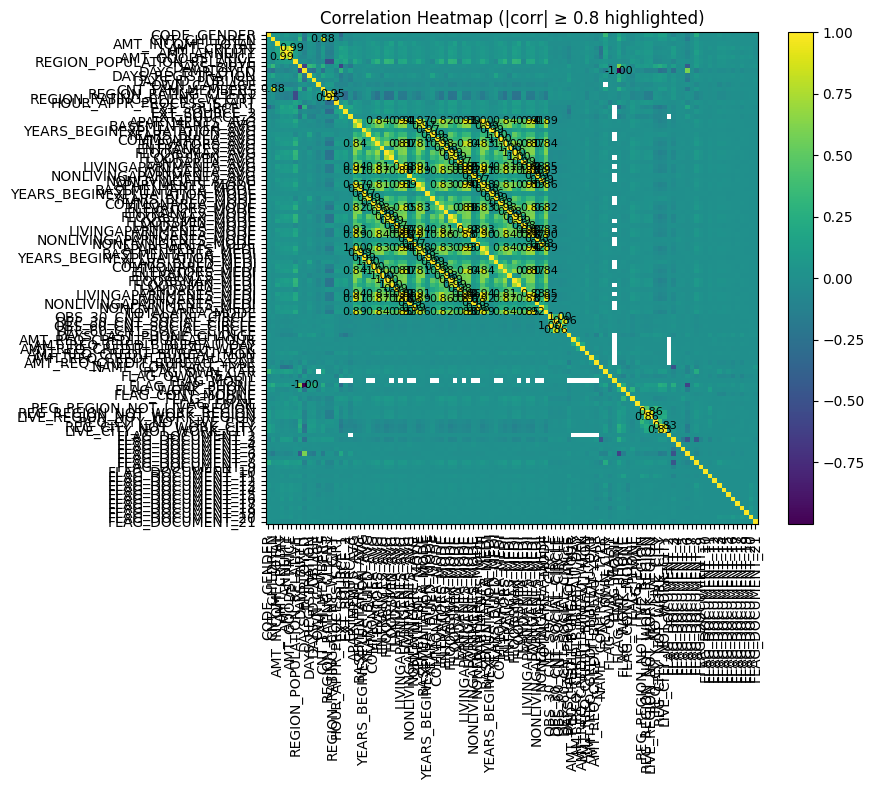

,var_1,var_2,correlation
117,CNT_CHILDREN,CNT_FAM_MEMBERS,0.879161
319,AMT_CREDIT,AMT_GOODS_PRICE,0.986968
896,DAYS_EMPLOYED,FLAG_EMP_PHONE,-0.999755
1312,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.950842
1861,APARTMENTS_AVG,ELEVATORS_AVG,0.836958
1866,APARTMENTS_AVG,LIVINGAPARTMENTS_AVG,0.943952
1867,APARTMENTS_AVG,LIVINGAREA_AVG,0.913619
1870,APARTMENTS_AVG,APARTMENTS_MODE,0.973259
1875,APARTMENTS_AVG,ELEVATORS_MODE,0.822553
1880,APARTMENTS_AVG,LIVINGAPARTMENTS_MODE,0.930554


In [6]:
# Plot correlation heatmap and highlight highly correlated variables (|corr| >= threshold)
import numpy as np
import matplotlib.pyplot as plt

# Assume X_trainval, numerical_vars, binary_vars already exist in the environment
cols = numerical_vars + binary_vars
corr = X_trainval[cols].corr()

threshold = 0.8  # define "highly correlated"

fig, ax = plt.subplots(figsize=(10, 8))

# Heatmap using matplotlib only
im = ax.imshow(corr.values)
plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

# Ticks and labels
ax.set_xticks(np.arange(len(cols)))
ax.set_yticks(np.arange(len(cols)))
ax.set_xticklabels(cols, rotation=90)
ax.set_yticklabels(cols)

# Highlight highly correlated pairs
for i in range(len(cols)):
    for j in range(len(cols)):
        if i != j and abs(corr.values[i, j]) >= threshold:
            ax.text(j, i, f"{corr.values[i, j]:.2f}",
                    ha="center", va="center", fontsize=8)

ax.set_title(f"Correlation Heatmap (|corr| ≥ {threshold} highlighted)")
plt.tight_layout()
plt.show()

# Also print the list of highly correlated variable pairs
high_corr_pairs = (
    corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
        .stack()
        .reset_index()
)
high_corr_pairs.columns = ["var_1", "var_2", "correlation"]
high_corr_pairs = high_corr_pairs[high_corr_pairs["correlation"].abs() >= threshold]

high_corr_pairs

/Users/fdd838/Library/CloudStorage/OneDrive-Sky/Desktop/personal/home-credit-default-risk/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Class Imbalance Ratio (scale_pos_weight): 11.39
Best Iteration: 184
Best AUC: 0.7679469060671864


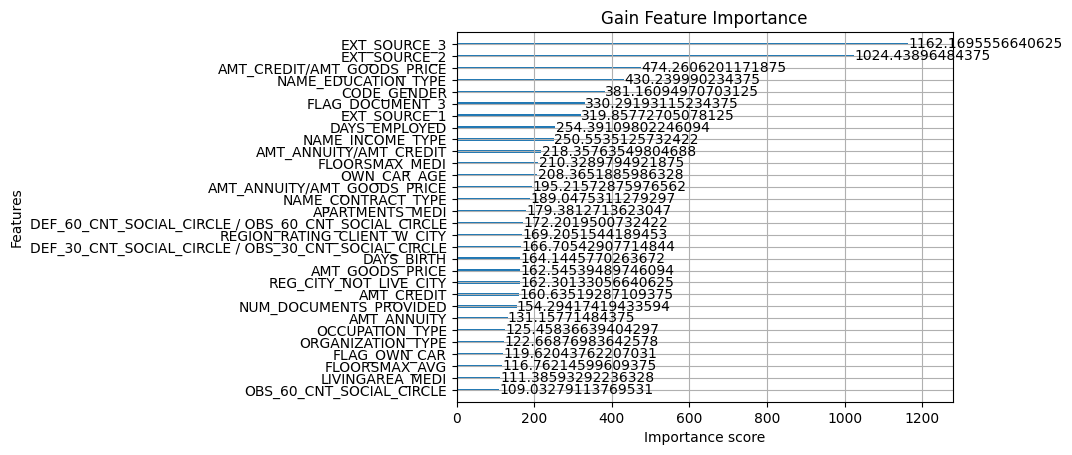


--- Computing SHAP Values ---


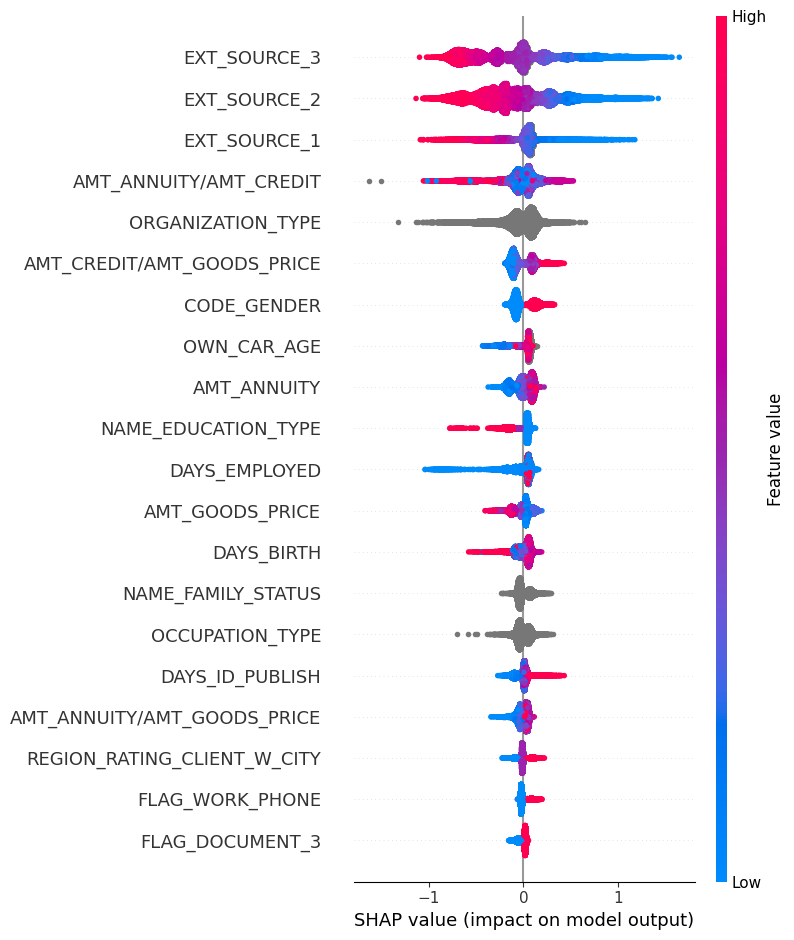

In [6]:
from sklearn.model_selection import train_test_split
import shap

X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=random_state, stratify=y_trainval)

# Calculate scale_pos_weight for imbalance
# Formula: sum(negative) / sum(positive)
n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)
scale_weight = n_neg / n_pos

print(f"Class Imbalance Ratio (scale_pos_weight): {scale_weight:.2f}")

# Create DMatrix
dsubtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dval = xgb.DMatrix(X_val, label=y_val, enable_categorical=True)

# ==========================================
# 3. Model Configuration & Training
# ==========================================

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    # Handling Imbalance
    'scale_pos_weight': scale_weight,
    
    # Handling Categorical Data
    # 'hist' tree method is required for efficient native categorical support
    'tree_method': 'hist', 
    
    # Null Handling: 
    # XGBoost automatically learns the best direction for NaNs. 
    # No explicit param needed, but you can set 'missing' if using a specific sentinel.
    
    'max_depth': 4,
    'eta': 0.1,
    'seed': 42
}

# Train the model
# Using the native train() method, not the sklearn fit() wrapper
results = {}
model = xgb.train(
    params=params,
    dtrain=dsubtrain,
    num_boost_round=500,
    evals=[(dsubtrain, 'train'), (dval, 'test')],
    early_stopping_rounds=10,
    evals_result=results,
    verbose_eval=False
)

print(f"Best Iteration: {model.best_iteration}")
print(f"Best AUC: {model.best_score}")

# 'gain' is usually the most informative metric (average gain in accuracy)
importance = model.get_score(importance_type='gain') 

# Plot native importance
xgb.plot_importance(model, importance_type='gain', title='Gain Feature Importance', max_num_features=30)
plt.show()

# ==========================================
# 5. SHAP Values
# ==========================================
print("\n--- Computing SHAP Values ---")


# Initialize Explainer
# model_output='raw' ensures we explain the log odds (margin)
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the test set
# Note: For native DMatrix with categoricals, SHAP handles them automatically
shap_values = explainer.shap_values(dval)

# Plot Summary
plt.figure()
shap.summary_plot(shap_values, X_val)

In [7]:
importance = pd.Series(importance).sort_values(ascending=False).reset_index()
importance.columns = ['Feature', 'Importance']
importance['%Importance'] = importance['Importance']/importance['Importance'].sum()*100
importance['CUMSUM %Importance'] = importance['%Importance'].cumsum()
importance

,Feature,Importance,%Importance,CUMSUM %Importance
0,EXT_SOURCE_3,1162.169556,9.244235,9.244235
1,EXT_SOURCE_2,1024.438965,8.148686,17.392921
2,AMT_CREDIT/AMT_GOODS_PRICE,474.260620,3.772407,21.165328
3,NAME_EDUCATION_TYPE,430.239990,3.422254,24.587582
4,CODE_GENDER,381.160950,3.031865,27.619447
5,FLAG_DOCUMENT_3,330.291931,2.627238,30.246685
6,EXT_SOURCE_1,319.857727,2.544241,32.790926
7,DAYS_EMPLOYED,254.391098,2.023501,34.814427
8,NAME_INCOME_TYPE,250.553513,1.992976,36.807403
9,AMT_ANNUITY/AMT_CREDIT,218.357635,1.736880,38.544283


In [8]:
shap_importance = pd.DataFrame(pd.DataFrame(shap_values, columns=X_trainval.columns).abs().mean(axis=0).sort_values(ascending=False)).reset_index()
shap_importance.columns = ['Feature', 'shap_importance']
shap_importance['%shap_importance'] = shap_importance['shap_importance']/shap_importance['shap_importance'].sum()*100
shap_importance['CUMSUM %shap_importance'] = shap_importance['%shap_importance'].cumsum()
shap_importance

,Feature,shap_importance,%shap_importance,CUMSUM %shap_importance
0,EXT_SOURCE_3,0.389994,15.438201,15.438201
1,EXT_SOURCE_2,0.333255,13.192159,28.630360
2,EXT_SOURCE_1,0.152300,6.028890,34.659248
3,AMT_ANNUITY/AMT_CREDIT,0.130472,5.164822,39.824070
4,ORGANIZATION_TYPE,0.119482,4.729789,44.553860
5,AMT_CREDIT/AMT_GOODS_PRICE,0.109220,4.323555,48.877415
6,CODE_GENDER,0.099477,3.937889,52.815304
7,OWN_CAR_AGE,0.088225,3.492456,56.307758
8,AMT_ANNUITY,0.079059,3.129625,59.437386
9,NAME_EDUCATION_TYPE,0.076641,3.033876,62.471260


In [9]:
X_trainval[['NUM_DOCUMENTS_PROVIDED', 'PCT_DOCUMENTS_PROVIDED']].sort_values(by='PCT_DOCUMENTS_PROVIDED', ascending=False)

,NUM_DOCUMENTS_PROVIDED,PCT_DOCUMENTS_PROVIDED
SK_ID_CURR,,
206962,4,0.017391
280668,3,0.013043
226125,3,0.013043
418319,3,0.013043
389151,3,0.013043
...,...,...
132409,0,0.000000
421421,0,0.000000
173060,0,0.000000


In [10]:
#save_submission(model, X_test, submission_name="submission2")

In [11]:
import optuna
import xgboost as xgb
import numpy as np

feature_names = X_train.columns.tolist()

def objective(trial):

    # ----------------------------
    # Feature selection mask
    # ----------------------------
    selected_features = []
    for f in feature_names:
        if trial.suggest_categorical(f, [0, 1]):
            selected_features.append(f)

    # Ensure at least one feature is selected
    if len(selected_features) == 0:
        return 0.0

    # ----------------------------
    # Subset data
    # ----------------------------
    X_tr = X_train[selected_features]
    X_va = X_val[selected_features]

    dtrain = xgb.DMatrix(
        X_tr, label=y_train, enable_categorical=True
    )
    dval = xgb.DMatrix(
        X_va, label=y_val, enable_categorical=True
    )

    # ----------------------------
    # XGBoost parameters
    # ----------------------------
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'tree_method': 'hist',
        'scale_pos_weight': scale_weight,
        'max_depth': 4,
        'eta': 0.1,
        'seed': 42,
        'verbosity': 0
    }

    # ----------------------------
    # Train
    # ----------------------------
    model = xgb.train(
        params=params,
        dtrain=dtrain,
        num_boost_round=300,
        evals=[(dval, 'val')],
        early_stopping_rounds=10,
        verbose_eval=False
    )

    return model.best_score

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=75, show_progress_bar=True)

[I 2025-12-14 17:42:13,489] A new study created in memory with name: no-name-46b452ec-2935-49d1-a211-308e7ec104e3
Best trial: 0. Best value: 0.745455:   1%|▏         | 1/75 [00:01<02:05,  1.70s/it]

[I 2025-12-14 17:42:15,205] Trial 0 finished with value: 0.7454546910263671 and parameters: {'NAME_CONTRACT_TYPE': 1, 'CODE_GENDER': 1, 'FLAG_OWN_CAR': 1, 'FLAG_OWN_REALTY': 0, 'CNT_CHILDREN': 1, 'AMT_INCOME_TOTAL': 0, 'AMT_CREDIT': 1, 'AMT_ANNUITY': 0, 'AMT_GOODS_PRICE': 0, 'NAME_TYPE_SUITE': 0, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 1, 'NAME_HOUSING_TYPE': 1, 'REGION_POPULATION_RELATIVE': 1, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 1, 'DAYS_REGISTRATION': 0, 'DAYS_ID_PUBLISH': 1, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 0, 'FLAG_EMP_PHONE': 1, 'FLAG_WORK_PHONE': 0, 'FLAG_CONT_MOBILE': 0, 'FLAG_PHONE': 1, 'FLAG_EMAIL': 1, 'OCCUPATION_TYPE': 1, 'CNT_FAM_MEMBERS': 0, 'REGION_RATING_CLIENT': 0, 'REGION_RATING_CLIENT_W_CITY': 0, 'WEEKDAY_APPR_PROCESS_START': 0, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 0, 'REG_REGION_NOT_WORK_REGION': 0, 'LIVE_REGION_NOT_WORK_REGION': 0, 'REG_CITY_NOT_LIVE_CITY': 0, 'REG_CITY_NOT_WORK_CITY': 0, 'LIVE_CITY_NOT_WORK_CITY': 

Best trial: 0. Best value: 0.745455:   3%|▎         | 2/75 [00:03<02:04,  1.70s/it]

[I 2025-12-14 17:42:16,913] Trial 1 finished with value: 0.743513754725186 and parameters: {'NAME_CONTRACT_TYPE': 1, 'CODE_GENDER': 0, 'FLAG_OWN_CAR': 1, 'FLAG_OWN_REALTY': 0, 'CNT_CHILDREN': 1, 'AMT_INCOME_TOTAL': 0, 'AMT_CREDIT': 1, 'AMT_ANNUITY': 1, 'AMT_GOODS_PRICE': 0, 'NAME_TYPE_SUITE': 1, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 0, 'NAME_FAMILY_STATUS': 1, 'NAME_HOUSING_TYPE': 0, 'REGION_POPULATION_RELATIVE': 1, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 0, 'DAYS_REGISTRATION': 0, 'DAYS_ID_PUBLISH': 1, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 0, 'FLAG_EMP_PHONE': 0, 'FLAG_WORK_PHONE': 1, 'FLAG_CONT_MOBILE': 1, 'FLAG_PHONE': 0, 'FLAG_EMAIL': 0, 'OCCUPATION_TYPE': 0, 'CNT_FAM_MEMBERS': 0, 'REGION_RATING_CLIENT': 0, 'REGION_RATING_CLIENT_W_CITY': 0, 'WEEKDAY_APPR_PROCESS_START': 0, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 0, 'REG_REGION_NOT_WORK_REGION': 0, 'LIVE_REGION_NOT_WORK_REGION': 1, 'REG_CITY_NOT_LIVE_CITY': 0, 'REG_CITY_NOT_WORK_CITY': 1, 'LIVE_CITY_NOT_WORK_CITY': 1

Best trial: 0. Best value: 0.745455:   4%|▍         | 3/75 [00:05<01:59,  1.66s/it]

[I 2025-12-14 17:42:18,510] Trial 2 finished with value: 0.7156107503666491 and parameters: {'NAME_CONTRACT_TYPE': 1, 'CODE_GENDER': 0, 'FLAG_OWN_CAR': 1, 'FLAG_OWN_REALTY': 1, 'CNT_CHILDREN': 1, 'AMT_INCOME_TOTAL': 0, 'AMT_CREDIT': 0, 'AMT_ANNUITY': 1, 'AMT_GOODS_PRICE': 1, 'NAME_TYPE_SUITE': 1, 'NAME_INCOME_TYPE': 1, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 0, 'NAME_HOUSING_TYPE': 0, 'REGION_POPULATION_RELATIVE': 0, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 0, 'DAYS_REGISTRATION': 1, 'DAYS_ID_PUBLISH': 1, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 1, 'FLAG_EMP_PHONE': 1, 'FLAG_WORK_PHONE': 0, 'FLAG_CONT_MOBILE': 0, 'FLAG_PHONE': 0, 'FLAG_EMAIL': 0, 'OCCUPATION_TYPE': 1, 'CNT_FAM_MEMBERS': 1, 'REGION_RATING_CLIENT': 0, 'REGION_RATING_CLIENT_W_CITY': 0, 'WEEKDAY_APPR_PROCESS_START': 1, 'HOUR_APPR_PROCESS_START': 1, 'REG_REGION_NOT_LIVE_REGION': 1, 'REG_REGION_NOT_WORK_REGION': 1, 'LIVE_REGION_NOT_WORK_REGION': 0, 'REG_CITY_NOT_LIVE_CITY': 1, 'REG_CITY_NOT_WORK_CITY': 0, 'LIVE_CITY_NOT_WORK_CITY': 

Best trial: 0. Best value: 0.745455:   5%|▌         | 4/75 [00:06<02:00,  1.70s/it]

[I 2025-12-14 17:42:20,269] Trial 3 finished with value: 0.7131282342629971 and parameters: {'NAME_CONTRACT_TYPE': 1, 'CODE_GENDER': 0, 'FLAG_OWN_CAR': 0, 'FLAG_OWN_REALTY': 0, 'CNT_CHILDREN': 0, 'AMT_INCOME_TOTAL': 1, 'AMT_CREDIT': 1, 'AMT_ANNUITY': 0, 'AMT_GOODS_PRICE': 1, 'NAME_TYPE_SUITE': 0, 'NAME_INCOME_TYPE': 1, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 0, 'NAME_HOUSING_TYPE': 0, 'REGION_POPULATION_RELATIVE': 0, 'DAYS_BIRTH': 0, 'DAYS_EMPLOYED': 1, 'DAYS_REGISTRATION': 1, 'DAYS_ID_PUBLISH': 0, 'OWN_CAR_AGE': 1, 'FLAG_MOBIL': 0, 'FLAG_EMP_PHONE': 1, 'FLAG_WORK_PHONE': 0, 'FLAG_CONT_MOBILE': 1, 'FLAG_PHONE': 0, 'FLAG_EMAIL': 0, 'OCCUPATION_TYPE': 0, 'CNT_FAM_MEMBERS': 0, 'REGION_RATING_CLIENT': 1, 'REGION_RATING_CLIENT_W_CITY': 1, 'WEEKDAY_APPR_PROCESS_START': 1, 'HOUR_APPR_PROCESS_START': 1, 'REG_REGION_NOT_LIVE_REGION': 0, 'REG_REGION_NOT_WORK_REGION': 0, 'LIVE_REGION_NOT_WORK_REGION': 1, 'REG_CITY_NOT_LIVE_CITY': 1, 'REG_CITY_NOT_WORK_CITY': 0, 'LIVE_CITY_NOT_WORK_CITY': 

Best trial: 0. Best value: 0.745455:   7%|▋         | 5/75 [00:08<01:50,  1.58s/it]

[I 2025-12-14 17:42:21,656] Trial 4 finished with value: 0.7343355039986474 and parameters: {'NAME_CONTRACT_TYPE': 1, 'CODE_GENDER': 1, 'FLAG_OWN_CAR': 0, 'FLAG_OWN_REALTY': 0, 'CNT_CHILDREN': 1, 'AMT_INCOME_TOTAL': 0, 'AMT_CREDIT': 0, 'AMT_ANNUITY': 1, 'AMT_GOODS_PRICE': 0, 'NAME_TYPE_SUITE': 1, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 0, 'NAME_FAMILY_STATUS': 0, 'NAME_HOUSING_TYPE': 0, 'REGION_POPULATION_RELATIVE': 1, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 0, 'DAYS_REGISTRATION': 1, 'DAYS_ID_PUBLISH': 0, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 0, 'FLAG_EMP_PHONE': 1, 'FLAG_WORK_PHONE': 0, 'FLAG_CONT_MOBILE': 0, 'FLAG_PHONE': 0, 'FLAG_EMAIL': 1, 'OCCUPATION_TYPE': 1, 'CNT_FAM_MEMBERS': 0, 'REGION_RATING_CLIENT': 1, 'REGION_RATING_CLIENT_W_CITY': 1, 'WEEKDAY_APPR_PROCESS_START': 1, 'HOUR_APPR_PROCESS_START': 1, 'REG_REGION_NOT_LIVE_REGION': 1, 'REG_REGION_NOT_WORK_REGION': 0, 'LIVE_REGION_NOT_WORK_REGION': 1, 'REG_CITY_NOT_LIVE_CITY': 1, 'REG_CITY_NOT_WORK_CITY': 0, 'LIVE_CITY_NOT_WORK_CITY': 

Best trial: 0. Best value: 0.745455:   8%|▊         | 6/75 [00:10<01:55,  1.68s/it]

[I 2025-12-14 17:42:23,520] Trial 5 finished with value: 0.7340703595799198 and parameters: {'NAME_CONTRACT_TYPE': 0, 'CODE_GENDER': 1, 'FLAG_OWN_CAR': 1, 'FLAG_OWN_REALTY': 0, 'CNT_CHILDREN': 1, 'AMT_INCOME_TOTAL': 0, 'AMT_CREDIT': 1, 'AMT_ANNUITY': 0, 'AMT_GOODS_PRICE': 0, 'NAME_TYPE_SUITE': 1, 'NAME_INCOME_TYPE': 1, 'NAME_EDUCATION_TYPE': 0, 'NAME_FAMILY_STATUS': 1, 'NAME_HOUSING_TYPE': 1, 'REGION_POPULATION_RELATIVE': 0, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 0, 'DAYS_REGISTRATION': 1, 'DAYS_ID_PUBLISH': 1, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 1, 'FLAG_EMP_PHONE': 1, 'FLAG_WORK_PHONE': 0, 'FLAG_CONT_MOBILE': 0, 'FLAG_PHONE': 0, 'FLAG_EMAIL': 1, 'OCCUPATION_TYPE': 1, 'CNT_FAM_MEMBERS': 1, 'REGION_RATING_CLIENT': 0, 'REGION_RATING_CLIENT_W_CITY': 1, 'WEEKDAY_APPR_PROCESS_START': 0, 'HOUR_APPR_PROCESS_START': 1, 'REG_REGION_NOT_LIVE_REGION': 1, 'REG_REGION_NOT_WORK_REGION': 1, 'LIVE_REGION_NOT_WORK_REGION': 0, 'REG_CITY_NOT_LIVE_CITY': 1, 'REG_CITY_NOT_WORK_CITY': 1, 'LIVE_CITY_NOT_WORK_CITY': 

Best trial: 6. Best value: 0.74701:   9%|▉         | 7/75 [00:12<02:01,  1.79s/it] 

[I 2025-12-14 17:42:25,548] Trial 6 finished with value: 0.7470096095570404 and parameters: {'NAME_CONTRACT_TYPE': 1, 'CODE_GENDER': 1, 'FLAG_OWN_CAR': 1, 'FLAG_OWN_REALTY': 0, 'CNT_CHILDREN': 0, 'AMT_INCOME_TOTAL': 0, 'AMT_CREDIT': 1, 'AMT_ANNUITY': 0, 'AMT_GOODS_PRICE': 0, 'NAME_TYPE_SUITE': 0, 'NAME_INCOME_TYPE': 1, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 1, 'NAME_HOUSING_TYPE': 0, 'REGION_POPULATION_RELATIVE': 1, 'DAYS_BIRTH': 0, 'DAYS_EMPLOYED': 1, 'DAYS_REGISTRATION': 1, 'DAYS_ID_PUBLISH': 1, 'OWN_CAR_AGE': 1, 'FLAG_MOBIL': 1, 'FLAG_EMP_PHONE': 1, 'FLAG_WORK_PHONE': 1, 'FLAG_CONT_MOBILE': 0, 'FLAG_PHONE': 0, 'FLAG_EMAIL': 1, 'OCCUPATION_TYPE': 1, 'CNT_FAM_MEMBERS': 0, 'REGION_RATING_CLIENT': 0, 'REGION_RATING_CLIENT_W_CITY': 0, 'WEEKDAY_APPR_PROCESS_START': 0, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 0, 'REG_REGION_NOT_WORK_REGION': 0, 'LIVE_REGION_NOT_WORK_REGION': 1, 'REG_CITY_NOT_LIVE_CITY': 0, 'REG_CITY_NOT_WORK_CITY': 0, 'LIVE_CITY_NOT_WORK_CITY': 

Best trial: 7. Best value: 0.74828:  11%|█         | 8/75 [00:13<02:01,  1.81s/it]

[I 2025-12-14 17:42:27,388] Trial 7 finished with value: 0.748280080910211 and parameters: {'NAME_CONTRACT_TYPE': 1, 'CODE_GENDER': 1, 'FLAG_OWN_CAR': 1, 'FLAG_OWN_REALTY': 0, 'CNT_CHILDREN': 0, 'AMT_INCOME_TOTAL': 0, 'AMT_CREDIT': 1, 'AMT_ANNUITY': 0, 'AMT_GOODS_PRICE': 1, 'NAME_TYPE_SUITE': 1, 'NAME_INCOME_TYPE': 1, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 1, 'NAME_HOUSING_TYPE': 1, 'REGION_POPULATION_RELATIVE': 0, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 0, 'DAYS_REGISTRATION': 1, 'DAYS_ID_PUBLISH': 1, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 0, 'FLAG_EMP_PHONE': 1, 'FLAG_WORK_PHONE': 1, 'FLAG_CONT_MOBILE': 0, 'FLAG_PHONE': 0, 'FLAG_EMAIL': 1, 'OCCUPATION_TYPE': 1, 'CNT_FAM_MEMBERS': 1, 'REGION_RATING_CLIENT': 1, 'REGION_RATING_CLIENT_W_CITY': 1, 'WEEKDAY_APPR_PROCESS_START': 0, 'HOUR_APPR_PROCESS_START': 1, 'REG_REGION_NOT_LIVE_REGION': 0, 'REG_REGION_NOT_WORK_REGION': 0, 'LIVE_REGION_NOT_WORK_REGION': 1, 'REG_CITY_NOT_LIVE_CITY': 0, 'REG_CITY_NOT_WORK_CITY': 1, 'LIVE_CITY_NOT_WORK_CITY': 0

Best trial: 8. Best value: 0.755324:  12%|█▏        | 9/75 [00:15<01:56,  1.77s/it]

[I 2025-12-14 17:42:29,065] Trial 8 finished with value: 0.7553241789416503 and parameters: {'NAME_CONTRACT_TYPE': 1, 'CODE_GENDER': 0, 'FLAG_OWN_CAR': 0, 'FLAG_OWN_REALTY': 0, 'CNT_CHILDREN': 0, 'AMT_INCOME_TOTAL': 1, 'AMT_CREDIT': 1, 'AMT_ANNUITY': 0, 'AMT_GOODS_PRICE': 1, 'NAME_TYPE_SUITE': 0, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 0, 'NAME_HOUSING_TYPE': 0, 'REGION_POPULATION_RELATIVE': 1, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 1, 'DAYS_REGISTRATION': 0, 'DAYS_ID_PUBLISH': 1, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 0, 'FLAG_EMP_PHONE': 0, 'FLAG_WORK_PHONE': 1, 'FLAG_CONT_MOBILE': 1, 'FLAG_PHONE': 0, 'FLAG_EMAIL': 1, 'OCCUPATION_TYPE': 0, 'CNT_FAM_MEMBERS': 1, 'REGION_RATING_CLIENT': 1, 'REGION_RATING_CLIENT_W_CITY': 1, 'WEEKDAY_APPR_PROCESS_START': 1, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 0, 'REG_REGION_NOT_WORK_REGION': 0, 'LIVE_REGION_NOT_WORK_REGION': 0, 'REG_CITY_NOT_LIVE_CITY': 1, 'REG_CITY_NOT_WORK_CITY': 1, 'LIVE_CITY_NOT_WORK_CITY': 

Best trial: 8. Best value: 0.755324:  13%|█▎        | 10/75 [00:17<01:51,  1.71s/it]

[I 2025-12-14 17:42:30,659] Trial 9 finished with value: 0.741014418841972 and parameters: {'NAME_CONTRACT_TYPE': 1, 'CODE_GENDER': 1, 'FLAG_OWN_CAR': 0, 'FLAG_OWN_REALTY': 1, 'CNT_CHILDREN': 0, 'AMT_INCOME_TOTAL': 1, 'AMT_CREDIT': 0, 'AMT_ANNUITY': 1, 'AMT_GOODS_PRICE': 0, 'NAME_TYPE_SUITE': 0, 'NAME_INCOME_TYPE': 1, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 0, 'NAME_HOUSING_TYPE': 1, 'REGION_POPULATION_RELATIVE': 1, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 0, 'DAYS_REGISTRATION': 1, 'DAYS_ID_PUBLISH': 1, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 1, 'FLAG_EMP_PHONE': 1, 'FLAG_WORK_PHONE': 0, 'FLAG_CONT_MOBILE': 0, 'FLAG_PHONE': 1, 'FLAG_EMAIL': 0, 'OCCUPATION_TYPE': 1, 'CNT_FAM_MEMBERS': 0, 'REGION_RATING_CLIENT': 0, 'REGION_RATING_CLIENT_W_CITY': 1, 'WEEKDAY_APPR_PROCESS_START': 1, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 1, 'REG_REGION_NOT_WORK_REGION': 1, 'LIVE_REGION_NOT_WORK_REGION': 1, 'REG_CITY_NOT_LIVE_CITY': 0, 'REG_CITY_NOT_WORK_CITY': 1, 'LIVE_CITY_NOT_WORK_CITY': 1

Best trial: 8. Best value: 0.755324:  15%|█▍        | 11/75 [00:18<01:46,  1.66s/it]

[I 2025-12-14 17:42:32,186] Trial 10 finished with value: 0.7374320498183239 and parameters: {'NAME_CONTRACT_TYPE': 0, 'CODE_GENDER': 0, 'FLAG_OWN_CAR': 0, 'FLAG_OWN_REALTY': 1, 'CNT_CHILDREN': 0, 'AMT_INCOME_TOTAL': 1, 'AMT_CREDIT': 0, 'AMT_ANNUITY': 0, 'AMT_GOODS_PRICE': 1, 'NAME_TYPE_SUITE': 0, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 0, 'NAME_FAMILY_STATUS': 0, 'NAME_HOUSING_TYPE': 0, 'REGION_POPULATION_RELATIVE': 1, 'DAYS_BIRTH': 0, 'DAYS_EMPLOYED': 1, 'DAYS_REGISTRATION': 0, 'DAYS_ID_PUBLISH': 0, 'OWN_CAR_AGE': 1, 'FLAG_MOBIL': 0, 'FLAG_EMP_PHONE': 0, 'FLAG_WORK_PHONE': 1, 'FLAG_CONT_MOBILE': 1, 'FLAG_PHONE': 1, 'FLAG_EMAIL': 1, 'OCCUPATION_TYPE': 0, 'CNT_FAM_MEMBERS': 1, 'REGION_RATING_CLIENT': 1, 'REGION_RATING_CLIENT_W_CITY': 1, 'WEEKDAY_APPR_PROCESS_START': 1, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 0, 'REG_REGION_NOT_WORK_REGION': 1, 'LIVE_REGION_NOT_WORK_REGION': 0, 'REG_CITY_NOT_LIVE_CITY': 1, 'REG_CITY_NOT_WORK_CITY': 1, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 8. Best value: 0.755324:  16%|█▌        | 12/75 [00:19<01:35,  1.51s/it]

[I 2025-12-14 17:42:33,366] Trial 11 finished with value: 0.7369703742106165 and parameters: {'NAME_CONTRACT_TYPE': 0, 'CODE_GENDER': 0, 'FLAG_OWN_CAR': 0, 'FLAG_OWN_REALTY': 0, 'CNT_CHILDREN': 0, 'AMT_INCOME_TOTAL': 1, 'AMT_CREDIT': 1, 'AMT_ANNUITY': 0, 'AMT_GOODS_PRICE': 1, 'NAME_TYPE_SUITE': 1, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 1, 'NAME_HOUSING_TYPE': 1, 'REGION_POPULATION_RELATIVE': 0, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 1, 'DAYS_REGISTRATION': 0, 'DAYS_ID_PUBLISH': 1, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 0, 'FLAG_EMP_PHONE': 0, 'FLAG_WORK_PHONE': 1, 'FLAG_CONT_MOBILE': 1, 'FLAG_PHONE': 0, 'FLAG_EMAIL': 1, 'OCCUPATION_TYPE': 0, 'CNT_FAM_MEMBERS': 1, 'REGION_RATING_CLIENT': 1, 'REGION_RATING_CLIENT_W_CITY': 1, 'WEEKDAY_APPR_PROCESS_START': 0, 'HOUR_APPR_PROCESS_START': 1, 'REG_REGION_NOT_LIVE_REGION': 0, 'REG_REGION_NOT_WORK_REGION': 0, 'LIVE_REGION_NOT_WORK_REGION': 0, 'REG_CITY_NOT_LIVE_CITY': 0, 'REG_CITY_NOT_WORK_CITY': 1, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 8. Best value: 0.755324:  17%|█▋        | 13/75 [00:21<01:38,  1.58s/it]

[I 2025-12-14 17:42:35,119] Trial 12 finished with value: 0.738629916294389 and parameters: {'NAME_CONTRACT_TYPE': 1, 'CODE_GENDER': 1, 'FLAG_OWN_CAR': 1, 'FLAG_OWN_REALTY': 0, 'CNT_CHILDREN': 0, 'AMT_INCOME_TOTAL': 1, 'AMT_CREDIT': 1, 'AMT_ANNUITY': 0, 'AMT_GOODS_PRICE': 1, 'NAME_TYPE_SUITE': 0, 'NAME_INCOME_TYPE': 1, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 1, 'NAME_HOUSING_TYPE': 1, 'REGION_POPULATION_RELATIVE': 0, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 1, 'DAYS_REGISTRATION': 0, 'DAYS_ID_PUBLISH': 1, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 0, 'FLAG_EMP_PHONE': 0, 'FLAG_WORK_PHONE': 1, 'FLAG_CONT_MOBILE': 1, 'FLAG_PHONE': 0, 'FLAG_EMAIL': 1, 'OCCUPATION_TYPE': 0, 'CNT_FAM_MEMBERS': 1, 'REGION_RATING_CLIENT': 1, 'REGION_RATING_CLIENT_W_CITY': 1, 'WEEKDAY_APPR_PROCESS_START': 1, 'HOUR_APPR_PROCESS_START': 1, 'REG_REGION_NOT_LIVE_REGION': 0, 'REG_REGION_NOT_WORK_REGION': 0, 'LIVE_REGION_NOT_WORK_REGION': 1, 'REG_CITY_NOT_LIVE_CITY': 0, 'REG_CITY_NOT_WORK_CITY': 1, 'LIVE_CITY_NOT_WORK_CITY': 

Best trial: 8. Best value: 0.755324:  19%|█▊        | 14/75 [00:23<01:44,  1.72s/it]

[I 2025-12-14 17:42:37,142] Trial 13 finished with value: 0.7543475362950466 and parameters: {'NAME_CONTRACT_TYPE': 1, 'CODE_GENDER': 0, 'FLAG_OWN_CAR': 0, 'FLAG_OWN_REALTY': 0, 'CNT_CHILDREN': 0, 'AMT_INCOME_TOTAL': 1, 'AMT_CREDIT': 1, 'AMT_ANNUITY': 0, 'AMT_GOODS_PRICE': 1, 'NAME_TYPE_SUITE': 1, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 0, 'NAME_HOUSING_TYPE': 1, 'REGION_POPULATION_RELATIVE': 0, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 0, 'DAYS_REGISTRATION': 0, 'DAYS_ID_PUBLISH': 1, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 0, 'FLAG_EMP_PHONE': 0, 'FLAG_WORK_PHONE': 1, 'FLAG_CONT_MOBILE': 1, 'FLAG_PHONE': 0, 'FLAG_EMAIL': 1, 'OCCUPATION_TYPE': 0, 'CNT_FAM_MEMBERS': 1, 'REGION_RATING_CLIENT': 1, 'REGION_RATING_CLIENT_W_CITY': 1, 'WEEKDAY_APPR_PROCESS_START': 0, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 0, 'REG_REGION_NOT_WORK_REGION': 0, 'LIVE_REGION_NOT_WORK_REGION': 0, 'REG_CITY_NOT_LIVE_CITY': 1, 'REG_CITY_NOT_WORK_CITY': 1, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 8. Best value: 0.755324:  20%|██        | 15/75 [00:25<01:42,  1.71s/it]

[I 2025-12-14 17:42:38,827] Trial 14 finished with value: 0.7486511153083079 and parameters: {'NAME_CONTRACT_TYPE': 0, 'CODE_GENDER': 0, 'FLAG_OWN_CAR': 0, 'FLAG_OWN_REALTY': 1, 'CNT_CHILDREN': 0, 'AMT_INCOME_TOTAL': 1, 'AMT_CREDIT': 1, 'AMT_ANNUITY': 0, 'AMT_GOODS_PRICE': 1, 'NAME_TYPE_SUITE': 1, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 0, 'NAME_HOUSING_TYPE': 0, 'REGION_POPULATION_RELATIVE': 0, 'DAYS_BIRTH': 0, 'DAYS_EMPLOYED': 0, 'DAYS_REGISTRATION': 0, 'DAYS_ID_PUBLISH': 0, 'OWN_CAR_AGE': 1, 'FLAG_MOBIL': 0, 'FLAG_EMP_PHONE': 0, 'FLAG_WORK_PHONE': 1, 'FLAG_CONT_MOBILE': 1, 'FLAG_PHONE': 1, 'FLAG_EMAIL': 1, 'OCCUPATION_TYPE': 0, 'CNT_FAM_MEMBERS': 1, 'REGION_RATING_CLIENT': 1, 'REGION_RATING_CLIENT_W_CITY': 1, 'WEEKDAY_APPR_PROCESS_START': 0, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 0, 'REG_REGION_NOT_WORK_REGION': 0, 'LIVE_REGION_NOT_WORK_REGION': 0, 'REG_CITY_NOT_LIVE_CITY': 1, 'REG_CITY_NOT_WORK_CITY': 1, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 8. Best value: 0.755324:  21%|██▏       | 16/75 [00:27<01:42,  1.73s/it]

[I 2025-12-14 17:42:40,618] Trial 15 finished with value: 0.7550119006664394 and parameters: {'NAME_CONTRACT_TYPE': 1, 'CODE_GENDER': 0, 'FLAG_OWN_CAR': 0, 'FLAG_OWN_REALTY': 0, 'CNT_CHILDREN': 0, 'AMT_INCOME_TOTAL': 1, 'AMT_CREDIT': 1, 'AMT_ANNUITY': 0, 'AMT_GOODS_PRICE': 1, 'NAME_TYPE_SUITE': 0, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 0, 'NAME_HOUSING_TYPE': 1, 'REGION_POPULATION_RELATIVE': 1, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 1, 'DAYS_REGISTRATION': 0, 'DAYS_ID_PUBLISH': 1, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 0, 'FLAG_EMP_PHONE': 0, 'FLAG_WORK_PHONE': 1, 'FLAG_CONT_MOBILE': 1, 'FLAG_PHONE': 0, 'FLAG_EMAIL': 1, 'OCCUPATION_TYPE': 0, 'CNT_FAM_MEMBERS': 1, 'REGION_RATING_CLIENT': 1, 'REGION_RATING_CLIENT_W_CITY': 1, 'WEEKDAY_APPR_PROCESS_START': 1, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 0, 'REG_REGION_NOT_WORK_REGION': 0, 'LIVE_REGION_NOT_WORK_REGION': 0, 'REG_CITY_NOT_LIVE_CITY': 1, 'REG_CITY_NOT_WORK_CITY': 1, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 8. Best value: 0.755324:  23%|██▎       | 17/75 [00:28<01:42,  1.76s/it]

[I 2025-12-14 17:42:42,446] Trial 16 finished with value: 0.7553230122620344 and parameters: {'NAME_CONTRACT_TYPE': 1, 'CODE_GENDER': 0, 'FLAG_OWN_CAR': 0, 'FLAG_OWN_REALTY': 0, 'CNT_CHILDREN': 0, 'AMT_INCOME_TOTAL': 1, 'AMT_CREDIT': 1, 'AMT_ANNUITY': 0, 'AMT_GOODS_PRICE': 1, 'NAME_TYPE_SUITE': 0, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 0, 'NAME_HOUSING_TYPE': 1, 'REGION_POPULATION_RELATIVE': 1, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 1, 'DAYS_REGISTRATION': 0, 'DAYS_ID_PUBLISH': 1, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 0, 'FLAG_EMP_PHONE': 0, 'FLAG_WORK_PHONE': 1, 'FLAG_CONT_MOBILE': 1, 'FLAG_PHONE': 0, 'FLAG_EMAIL': 1, 'OCCUPATION_TYPE': 0, 'CNT_FAM_MEMBERS': 1, 'REGION_RATING_CLIENT': 1, 'REGION_RATING_CLIENT_W_CITY': 1, 'WEEKDAY_APPR_PROCESS_START': 1, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 0, 'REG_REGION_NOT_WORK_REGION': 0, 'LIVE_REGION_NOT_WORK_REGION': 0, 'REG_CITY_NOT_LIVE_CITY': 1, 'REG_CITY_NOT_WORK_CITY': 1, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 8. Best value: 0.755324:  24%|██▍       | 18/75 [00:30<01:39,  1.74s/it]

[I 2025-12-14 17:42:44,142] Trial 17 finished with value: 0.7553241789416503 and parameters: {'NAME_CONTRACT_TYPE': 1, 'CODE_GENDER': 0, 'FLAG_OWN_CAR': 0, 'FLAG_OWN_REALTY': 0, 'CNT_CHILDREN': 0, 'AMT_INCOME_TOTAL': 1, 'AMT_CREDIT': 1, 'AMT_ANNUITY': 0, 'AMT_GOODS_PRICE': 1, 'NAME_TYPE_SUITE': 0, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 0, 'NAME_HOUSING_TYPE': 0, 'REGION_POPULATION_RELATIVE': 1, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 1, 'DAYS_REGISTRATION': 0, 'DAYS_ID_PUBLISH': 1, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 0, 'FLAG_EMP_PHONE': 0, 'FLAG_WORK_PHONE': 1, 'FLAG_CONT_MOBILE': 1, 'FLAG_PHONE': 0, 'FLAG_EMAIL': 1, 'OCCUPATION_TYPE': 0, 'CNT_FAM_MEMBERS': 1, 'REGION_RATING_CLIENT': 1, 'REGION_RATING_CLIENT_W_CITY': 1, 'WEEKDAY_APPR_PROCESS_START': 1, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 0, 'REG_REGION_NOT_WORK_REGION': 0, 'LIVE_REGION_NOT_WORK_REGION': 0, 'REG_CITY_NOT_LIVE_CITY': 1, 'REG_CITY_NOT_WORK_CITY': 1, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 8. Best value: 0.755324:  25%|██▌       | 19/75 [00:32<01:38,  1.76s/it]

[I 2025-12-14 17:42:45,948] Trial 18 finished with value: 0.7429204598449004 and parameters: {'NAME_CONTRACT_TYPE': 0, 'CODE_GENDER': 0, 'FLAG_OWN_CAR': 0, 'FLAG_OWN_REALTY': 1, 'CNT_CHILDREN': 0, 'AMT_INCOME_TOTAL': 1, 'AMT_CREDIT': 0, 'AMT_ANNUITY': 1, 'AMT_GOODS_PRICE': 1, 'NAME_TYPE_SUITE': 0, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 0, 'NAME_FAMILY_STATUS': 0, 'NAME_HOUSING_TYPE': 0, 'REGION_POPULATION_RELATIVE': 1, 'DAYS_BIRTH': 0, 'DAYS_EMPLOYED': 1, 'DAYS_REGISTRATION': 0, 'DAYS_ID_PUBLISH': 0, 'OWN_CAR_AGE': 1, 'FLAG_MOBIL': 1, 'FLAG_EMP_PHONE': 0, 'FLAG_WORK_PHONE': 1, 'FLAG_CONT_MOBILE': 1, 'FLAG_PHONE': 1, 'FLAG_EMAIL': 0, 'OCCUPATION_TYPE': 0, 'CNT_FAM_MEMBERS': 1, 'REGION_RATING_CLIENT': 1, 'REGION_RATING_CLIENT_W_CITY': 0, 'WEEKDAY_APPR_PROCESS_START': 1, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 1, 'REG_REGION_NOT_WORK_REGION': 1, 'LIVE_REGION_NOT_WORK_REGION': 0, 'REG_CITY_NOT_LIVE_CITY': 1, 'REG_CITY_NOT_WORK_CITY': 1, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 8. Best value: 0.755324:  27%|██▋       | 20/75 [00:34<01:36,  1.75s/it]

[I 2025-12-14 17:42:47,679] Trial 19 finished with value: 0.7553241789416503 and parameters: {'NAME_CONTRACT_TYPE': 1, 'CODE_GENDER': 0, 'FLAG_OWN_CAR': 0, 'FLAG_OWN_REALTY': 0, 'CNT_CHILDREN': 0, 'AMT_INCOME_TOTAL': 1, 'AMT_CREDIT': 1, 'AMT_ANNUITY': 0, 'AMT_GOODS_PRICE': 1, 'NAME_TYPE_SUITE': 0, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 0, 'NAME_HOUSING_TYPE': 0, 'REGION_POPULATION_RELATIVE': 1, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 1, 'DAYS_REGISTRATION': 0, 'DAYS_ID_PUBLISH': 1, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 0, 'FLAG_EMP_PHONE': 0, 'FLAG_WORK_PHONE': 1, 'FLAG_CONT_MOBILE': 1, 'FLAG_PHONE': 0, 'FLAG_EMAIL': 1, 'OCCUPATION_TYPE': 0, 'CNT_FAM_MEMBERS': 1, 'REGION_RATING_CLIENT': 1, 'REGION_RATING_CLIENT_W_CITY': 1, 'WEEKDAY_APPR_PROCESS_START': 1, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 0, 'REG_REGION_NOT_WORK_REGION': 0, 'LIVE_REGION_NOT_WORK_REGION': 0, 'REG_CITY_NOT_LIVE_CITY': 1, 'REG_CITY_NOT_WORK_CITY': 1, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 8. Best value: 0.755324:  28%|██▊       | 21/75 [00:35<01:34,  1.75s/it]

[I 2025-12-14 17:42:49,421] Trial 20 finished with value: 0.7553241789416503 and parameters: {'NAME_CONTRACT_TYPE': 1, 'CODE_GENDER': 0, 'FLAG_OWN_CAR': 0, 'FLAG_OWN_REALTY': 0, 'CNT_CHILDREN': 0, 'AMT_INCOME_TOTAL': 1, 'AMT_CREDIT': 1, 'AMT_ANNUITY': 0, 'AMT_GOODS_PRICE': 1, 'NAME_TYPE_SUITE': 0, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 0, 'NAME_HOUSING_TYPE': 0, 'REGION_POPULATION_RELATIVE': 1, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 1, 'DAYS_REGISTRATION': 0, 'DAYS_ID_PUBLISH': 1, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 0, 'FLAG_EMP_PHONE': 0, 'FLAG_WORK_PHONE': 1, 'FLAG_CONT_MOBILE': 1, 'FLAG_PHONE': 0, 'FLAG_EMAIL': 1, 'OCCUPATION_TYPE': 0, 'CNT_FAM_MEMBERS': 1, 'REGION_RATING_CLIENT': 1, 'REGION_RATING_CLIENT_W_CITY': 1, 'WEEKDAY_APPR_PROCESS_START': 1, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 0, 'REG_REGION_NOT_WORK_REGION': 0, 'LIVE_REGION_NOT_WORK_REGION': 0, 'REG_CITY_NOT_LIVE_CITY': 1, 'REG_CITY_NOT_WORK_CITY': 1, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 8. Best value: 0.755324:  29%|██▉       | 22/75 [00:37<01:32,  1.75s/it]

[I 2025-12-14 17:42:51,185] Trial 21 finished with value: 0.7553241789416503 and parameters: {'NAME_CONTRACT_TYPE': 1, 'CODE_GENDER': 0, 'FLAG_OWN_CAR': 0, 'FLAG_OWN_REALTY': 0, 'CNT_CHILDREN': 0, 'AMT_INCOME_TOTAL': 1, 'AMT_CREDIT': 1, 'AMT_ANNUITY': 0, 'AMT_GOODS_PRICE': 1, 'NAME_TYPE_SUITE': 0, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 0, 'NAME_HOUSING_TYPE': 0, 'REGION_POPULATION_RELATIVE': 1, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 1, 'DAYS_REGISTRATION': 0, 'DAYS_ID_PUBLISH': 1, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 0, 'FLAG_EMP_PHONE': 0, 'FLAG_WORK_PHONE': 1, 'FLAG_CONT_MOBILE': 1, 'FLAG_PHONE': 0, 'FLAG_EMAIL': 1, 'OCCUPATION_TYPE': 0, 'CNT_FAM_MEMBERS': 1, 'REGION_RATING_CLIENT': 1, 'REGION_RATING_CLIENT_W_CITY': 1, 'WEEKDAY_APPR_PROCESS_START': 1, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 0, 'REG_REGION_NOT_WORK_REGION': 0, 'LIVE_REGION_NOT_WORK_REGION': 0, 'REG_CITY_NOT_LIVE_CITY': 1, 'REG_CITY_NOT_WORK_CITY': 1, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 8. Best value: 0.755324:  31%|███       | 23/75 [00:39<01:31,  1.75s/it]

[I 2025-12-14 17:42:52,940] Trial 22 finished with value: 0.7553241789416503 and parameters: {'NAME_CONTRACT_TYPE': 1, 'CODE_GENDER': 0, 'FLAG_OWN_CAR': 0, 'FLAG_OWN_REALTY': 0, 'CNT_CHILDREN': 0, 'AMT_INCOME_TOTAL': 1, 'AMT_CREDIT': 1, 'AMT_ANNUITY': 0, 'AMT_GOODS_PRICE': 1, 'NAME_TYPE_SUITE': 0, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 0, 'NAME_HOUSING_TYPE': 0, 'REGION_POPULATION_RELATIVE': 1, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 1, 'DAYS_REGISTRATION': 0, 'DAYS_ID_PUBLISH': 1, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 0, 'FLAG_EMP_PHONE': 0, 'FLAG_WORK_PHONE': 1, 'FLAG_CONT_MOBILE': 1, 'FLAG_PHONE': 0, 'FLAG_EMAIL': 1, 'OCCUPATION_TYPE': 0, 'CNT_FAM_MEMBERS': 1, 'REGION_RATING_CLIENT': 1, 'REGION_RATING_CLIENT_W_CITY': 1, 'WEEKDAY_APPR_PROCESS_START': 1, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 0, 'REG_REGION_NOT_WORK_REGION': 0, 'LIVE_REGION_NOT_WORK_REGION': 0, 'REG_CITY_NOT_LIVE_CITY': 1, 'REG_CITY_NOT_WORK_CITY': 1, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 8. Best value: 0.755324:  32%|███▏      | 24/75 [00:41<01:29,  1.75s/it]

[I 2025-12-14 17:42:54,678] Trial 23 finished with value: 0.7553241789416503 and parameters: {'NAME_CONTRACT_TYPE': 1, 'CODE_GENDER': 0, 'FLAG_OWN_CAR': 0, 'FLAG_OWN_REALTY': 0, 'CNT_CHILDREN': 0, 'AMT_INCOME_TOTAL': 1, 'AMT_CREDIT': 1, 'AMT_ANNUITY': 0, 'AMT_GOODS_PRICE': 1, 'NAME_TYPE_SUITE': 0, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 0, 'NAME_HOUSING_TYPE': 0, 'REGION_POPULATION_RELATIVE': 1, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 1, 'DAYS_REGISTRATION': 0, 'DAYS_ID_PUBLISH': 1, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 0, 'FLAG_EMP_PHONE': 0, 'FLAG_WORK_PHONE': 1, 'FLAG_CONT_MOBILE': 1, 'FLAG_PHONE': 0, 'FLAG_EMAIL': 1, 'OCCUPATION_TYPE': 0, 'CNT_FAM_MEMBERS': 1, 'REGION_RATING_CLIENT': 1, 'REGION_RATING_CLIENT_W_CITY': 1, 'WEEKDAY_APPR_PROCESS_START': 1, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 0, 'REG_REGION_NOT_WORK_REGION': 0, 'LIVE_REGION_NOT_WORK_REGION': 0, 'REG_CITY_NOT_LIVE_CITY': 1, 'REG_CITY_NOT_WORK_CITY': 1, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 8. Best value: 0.755324:  33%|███▎      | 25/75 [00:42<01:27,  1.75s/it]

[I 2025-12-14 17:42:56,421] Trial 24 finished with value: 0.7553241789416503 and parameters: {'NAME_CONTRACT_TYPE': 1, 'CODE_GENDER': 0, 'FLAG_OWN_CAR': 0, 'FLAG_OWN_REALTY': 0, 'CNT_CHILDREN': 0, 'AMT_INCOME_TOTAL': 1, 'AMT_CREDIT': 1, 'AMT_ANNUITY': 0, 'AMT_GOODS_PRICE': 1, 'NAME_TYPE_SUITE': 0, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 0, 'NAME_HOUSING_TYPE': 0, 'REGION_POPULATION_RELATIVE': 1, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 1, 'DAYS_REGISTRATION': 0, 'DAYS_ID_PUBLISH': 1, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 0, 'FLAG_EMP_PHONE': 0, 'FLAG_WORK_PHONE': 1, 'FLAG_CONT_MOBILE': 1, 'FLAG_PHONE': 0, 'FLAG_EMAIL': 1, 'OCCUPATION_TYPE': 0, 'CNT_FAM_MEMBERS': 1, 'REGION_RATING_CLIENT': 1, 'REGION_RATING_CLIENT_W_CITY': 1, 'WEEKDAY_APPR_PROCESS_START': 1, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 0, 'REG_REGION_NOT_WORK_REGION': 0, 'LIVE_REGION_NOT_WORK_REGION': 0, 'REG_CITY_NOT_LIVE_CITY': 1, 'REG_CITY_NOT_WORK_CITY': 1, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 8. Best value: 0.755324:  35%|███▍      | 26/75 [00:44<01:25,  1.74s/it]

[I 2025-12-14 17:42:58,154] Trial 25 finished with value: 0.7553241789416503 and parameters: {'NAME_CONTRACT_TYPE': 1, 'CODE_GENDER': 0, 'FLAG_OWN_CAR': 0, 'FLAG_OWN_REALTY': 0, 'CNT_CHILDREN': 0, 'AMT_INCOME_TOTAL': 1, 'AMT_CREDIT': 1, 'AMT_ANNUITY': 0, 'AMT_GOODS_PRICE': 1, 'NAME_TYPE_SUITE': 0, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 0, 'NAME_HOUSING_TYPE': 0, 'REGION_POPULATION_RELATIVE': 1, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 1, 'DAYS_REGISTRATION': 0, 'DAYS_ID_PUBLISH': 1, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 0, 'FLAG_EMP_PHONE': 0, 'FLAG_WORK_PHONE': 1, 'FLAG_CONT_MOBILE': 1, 'FLAG_PHONE': 0, 'FLAG_EMAIL': 1, 'OCCUPATION_TYPE': 0, 'CNT_FAM_MEMBERS': 1, 'REGION_RATING_CLIENT': 1, 'REGION_RATING_CLIENT_W_CITY': 1, 'WEEKDAY_APPR_PROCESS_START': 1, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 0, 'REG_REGION_NOT_WORK_REGION': 0, 'LIVE_REGION_NOT_WORK_REGION': 0, 'REG_CITY_NOT_LIVE_CITY': 1, 'REG_CITY_NOT_WORK_CITY': 1, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 8. Best value: 0.755324:  36%|███▌      | 27/75 [00:46<01:18,  1.64s/it]

[I 2025-12-14 17:42:59,548] Trial 26 finished with value: 0.7168171149014128 and parameters: {'NAME_CONTRACT_TYPE': 0, 'CODE_GENDER': 0, 'FLAG_OWN_CAR': 0, 'FLAG_OWN_REALTY': 1, 'CNT_CHILDREN': 1, 'AMT_INCOME_TOTAL': 1, 'AMT_CREDIT': 0, 'AMT_ANNUITY': 1, 'AMT_GOODS_PRICE': 1, 'NAME_TYPE_SUITE': 0, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 0, 'NAME_FAMILY_STATUS': 0, 'NAME_HOUSING_TYPE': 0, 'REGION_POPULATION_RELATIVE': 1, 'DAYS_BIRTH': 0, 'DAYS_EMPLOYED': 1, 'DAYS_REGISTRATION': 0, 'DAYS_ID_PUBLISH': 0, 'OWN_CAR_AGE': 1, 'FLAG_MOBIL': 1, 'FLAG_EMP_PHONE': 0, 'FLAG_WORK_PHONE': 1, 'FLAG_CONT_MOBILE': 1, 'FLAG_PHONE': 1, 'FLAG_EMAIL': 0, 'OCCUPATION_TYPE': 0, 'CNT_FAM_MEMBERS': 1, 'REGION_RATING_CLIENT': 1, 'REGION_RATING_CLIENT_W_CITY': 0, 'WEEKDAY_APPR_PROCESS_START': 1, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 1, 'REG_REGION_NOT_WORK_REGION': 1, 'LIVE_REGION_NOT_WORK_REGION': 0, 'REG_CITY_NOT_LIVE_CITY': 1, 'REG_CITY_NOT_WORK_CITY': 0, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 8. Best value: 0.755324:  37%|███▋      | 28/75 [00:47<01:18,  1.67s/it]

[I 2025-12-14 17:43:01,289] Trial 27 finished with value: 0.7553241789416503 and parameters: {'NAME_CONTRACT_TYPE': 1, 'CODE_GENDER': 0, 'FLAG_OWN_CAR': 0, 'FLAG_OWN_REALTY': 0, 'CNT_CHILDREN': 0, 'AMT_INCOME_TOTAL': 1, 'AMT_CREDIT': 1, 'AMT_ANNUITY': 0, 'AMT_GOODS_PRICE': 1, 'NAME_TYPE_SUITE': 0, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 0, 'NAME_HOUSING_TYPE': 0, 'REGION_POPULATION_RELATIVE': 1, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 1, 'DAYS_REGISTRATION': 0, 'DAYS_ID_PUBLISH': 1, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 0, 'FLAG_EMP_PHONE': 0, 'FLAG_WORK_PHONE': 1, 'FLAG_CONT_MOBILE': 1, 'FLAG_PHONE': 0, 'FLAG_EMAIL': 1, 'OCCUPATION_TYPE': 0, 'CNT_FAM_MEMBERS': 1, 'REGION_RATING_CLIENT': 1, 'REGION_RATING_CLIENT_W_CITY': 1, 'WEEKDAY_APPR_PROCESS_START': 1, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 0, 'REG_REGION_NOT_WORK_REGION': 0, 'LIVE_REGION_NOT_WORK_REGION': 0, 'REG_CITY_NOT_LIVE_CITY': 1, 'REG_CITY_NOT_WORK_CITY': 1, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 8. Best value: 0.755324:  39%|███▊      | 29/75 [00:49<01:17,  1.69s/it]

[I 2025-12-14 17:43:03,025] Trial 28 finished with value: 0.7553241789416503 and parameters: {'NAME_CONTRACT_TYPE': 1, 'CODE_GENDER': 0, 'FLAG_OWN_CAR': 0, 'FLAG_OWN_REALTY': 0, 'CNT_CHILDREN': 0, 'AMT_INCOME_TOTAL': 1, 'AMT_CREDIT': 1, 'AMT_ANNUITY': 0, 'AMT_GOODS_PRICE': 1, 'NAME_TYPE_SUITE': 0, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 0, 'NAME_HOUSING_TYPE': 0, 'REGION_POPULATION_RELATIVE': 1, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 1, 'DAYS_REGISTRATION': 0, 'DAYS_ID_PUBLISH': 1, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 0, 'FLAG_EMP_PHONE': 0, 'FLAG_WORK_PHONE': 1, 'FLAG_CONT_MOBILE': 1, 'FLAG_PHONE': 0, 'FLAG_EMAIL': 1, 'OCCUPATION_TYPE': 0, 'CNT_FAM_MEMBERS': 1, 'REGION_RATING_CLIENT': 1, 'REGION_RATING_CLIENT_W_CITY': 1, 'WEEKDAY_APPR_PROCESS_START': 1, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 0, 'REG_REGION_NOT_WORK_REGION': 0, 'LIVE_REGION_NOT_WORK_REGION': 0, 'REG_CITY_NOT_LIVE_CITY': 1, 'REG_CITY_NOT_WORK_CITY': 1, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 8. Best value: 0.755324:  40%|████      | 30/75 [00:51<01:22,  1.83s/it]

[I 2025-12-14 17:43:05,172] Trial 29 finished with value: 0.7298876653180563 and parameters: {'NAME_CONTRACT_TYPE': 1, 'CODE_GENDER': 0, 'FLAG_OWN_CAR': 0, 'FLAG_OWN_REALTY': 0, 'CNT_CHILDREN': 1, 'AMT_INCOME_TOTAL': 1, 'AMT_CREDIT': 1, 'AMT_ANNUITY': 0, 'AMT_GOODS_PRICE': 0, 'NAME_TYPE_SUITE': 0, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 0, 'NAME_HOUSING_TYPE': 0, 'REGION_POPULATION_RELATIVE': 1, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 1, 'DAYS_REGISTRATION': 0, 'DAYS_ID_PUBLISH': 1, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 0, 'FLAG_EMP_PHONE': 0, 'FLAG_WORK_PHONE': 0, 'FLAG_CONT_MOBILE': 1, 'FLAG_PHONE': 1, 'FLAG_EMAIL': 1, 'OCCUPATION_TYPE': 0, 'CNT_FAM_MEMBERS': 0, 'REGION_RATING_CLIENT': 0, 'REGION_RATING_CLIENT_W_CITY': 0, 'WEEKDAY_APPR_PROCESS_START': 1, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 0, 'REG_REGION_NOT_WORK_REGION': 0, 'LIVE_REGION_NOT_WORK_REGION': 0, 'REG_CITY_NOT_LIVE_CITY': 1, 'REG_CITY_NOT_WORK_CITY': 0, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 8. Best value: 0.755324:  41%|████▏     | 31/75 [00:53<01:19,  1.82s/it]

[I 2025-12-14 17:43:06,961] Trial 30 finished with value: 0.7553241789416503 and parameters: {'NAME_CONTRACT_TYPE': 1, 'CODE_GENDER': 0, 'FLAG_OWN_CAR': 0, 'FLAG_OWN_REALTY': 0, 'CNT_CHILDREN': 0, 'AMT_INCOME_TOTAL': 1, 'AMT_CREDIT': 1, 'AMT_ANNUITY': 0, 'AMT_GOODS_PRICE': 1, 'NAME_TYPE_SUITE': 0, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 0, 'NAME_HOUSING_TYPE': 0, 'REGION_POPULATION_RELATIVE': 1, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 1, 'DAYS_REGISTRATION': 0, 'DAYS_ID_PUBLISH': 1, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 0, 'FLAG_EMP_PHONE': 0, 'FLAG_WORK_PHONE': 1, 'FLAG_CONT_MOBILE': 1, 'FLAG_PHONE': 0, 'FLAG_EMAIL': 1, 'OCCUPATION_TYPE': 0, 'CNT_FAM_MEMBERS': 1, 'REGION_RATING_CLIENT': 1, 'REGION_RATING_CLIENT_W_CITY': 1, 'WEEKDAY_APPR_PROCESS_START': 1, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 0, 'REG_REGION_NOT_WORK_REGION': 0, 'LIVE_REGION_NOT_WORK_REGION': 0, 'REG_CITY_NOT_LIVE_CITY': 1, 'REG_CITY_NOT_WORK_CITY': 1, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 8. Best value: 0.755324:  43%|████▎     | 32/75 [00:55<01:17,  1.80s/it]

[I 2025-12-14 17:43:08,732] Trial 31 finished with value: 0.7553241789416503 and parameters: {'NAME_CONTRACT_TYPE': 1, 'CODE_GENDER': 0, 'FLAG_OWN_CAR': 0, 'FLAG_OWN_REALTY': 0, 'CNT_CHILDREN': 0, 'AMT_INCOME_TOTAL': 1, 'AMT_CREDIT': 1, 'AMT_ANNUITY': 0, 'AMT_GOODS_PRICE': 1, 'NAME_TYPE_SUITE': 0, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 0, 'NAME_HOUSING_TYPE': 0, 'REGION_POPULATION_RELATIVE': 1, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 1, 'DAYS_REGISTRATION': 0, 'DAYS_ID_PUBLISH': 1, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 0, 'FLAG_EMP_PHONE': 0, 'FLAG_WORK_PHONE': 1, 'FLAG_CONT_MOBILE': 1, 'FLAG_PHONE': 0, 'FLAG_EMAIL': 1, 'OCCUPATION_TYPE': 0, 'CNT_FAM_MEMBERS': 1, 'REGION_RATING_CLIENT': 1, 'REGION_RATING_CLIENT_W_CITY': 1, 'WEEKDAY_APPR_PROCESS_START': 1, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 0, 'REG_REGION_NOT_WORK_REGION': 0, 'LIVE_REGION_NOT_WORK_REGION': 0, 'REG_CITY_NOT_LIVE_CITY': 1, 'REG_CITY_NOT_WORK_CITY': 1, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 8. Best value: 0.755324:  44%|████▍     | 33/75 [00:57<01:15,  1.80s/it]

[I 2025-12-14 17:43:10,515] Trial 32 finished with value: 0.7553241789416503 and parameters: {'NAME_CONTRACT_TYPE': 1, 'CODE_GENDER': 0, 'FLAG_OWN_CAR': 0, 'FLAG_OWN_REALTY': 0, 'CNT_CHILDREN': 0, 'AMT_INCOME_TOTAL': 1, 'AMT_CREDIT': 1, 'AMT_ANNUITY': 0, 'AMT_GOODS_PRICE': 1, 'NAME_TYPE_SUITE': 0, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 0, 'NAME_HOUSING_TYPE': 0, 'REGION_POPULATION_RELATIVE': 1, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 1, 'DAYS_REGISTRATION': 0, 'DAYS_ID_PUBLISH': 1, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 0, 'FLAG_EMP_PHONE': 0, 'FLAG_WORK_PHONE': 1, 'FLAG_CONT_MOBILE': 1, 'FLAG_PHONE': 0, 'FLAG_EMAIL': 1, 'OCCUPATION_TYPE': 0, 'CNT_FAM_MEMBERS': 1, 'REGION_RATING_CLIENT': 1, 'REGION_RATING_CLIENT_W_CITY': 1, 'WEEKDAY_APPR_PROCESS_START': 1, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 0, 'REG_REGION_NOT_WORK_REGION': 0, 'LIVE_REGION_NOT_WORK_REGION': 0, 'REG_CITY_NOT_LIVE_CITY': 1, 'REG_CITY_NOT_WORK_CITY': 1, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 8. Best value: 0.755324:  45%|████▌     | 34/75 [00:58<01:13,  1.80s/it]

[I 2025-12-14 17:43:12,331] Trial 33 finished with value: 0.7553241789416503 and parameters: {'NAME_CONTRACT_TYPE': 1, 'CODE_GENDER': 0, 'FLAG_OWN_CAR': 0, 'FLAG_OWN_REALTY': 0, 'CNT_CHILDREN': 0, 'AMT_INCOME_TOTAL': 1, 'AMT_CREDIT': 1, 'AMT_ANNUITY': 0, 'AMT_GOODS_PRICE': 1, 'NAME_TYPE_SUITE': 0, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 0, 'NAME_HOUSING_TYPE': 0, 'REGION_POPULATION_RELATIVE': 1, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 1, 'DAYS_REGISTRATION': 0, 'DAYS_ID_PUBLISH': 1, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 0, 'FLAG_EMP_PHONE': 0, 'FLAG_WORK_PHONE': 1, 'FLAG_CONT_MOBILE': 1, 'FLAG_PHONE': 0, 'FLAG_EMAIL': 1, 'OCCUPATION_TYPE': 0, 'CNT_FAM_MEMBERS': 1, 'REGION_RATING_CLIENT': 1, 'REGION_RATING_CLIENT_W_CITY': 1, 'WEEKDAY_APPR_PROCESS_START': 1, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 0, 'REG_REGION_NOT_WORK_REGION': 0, 'LIVE_REGION_NOT_WORK_REGION': 0, 'REG_CITY_NOT_LIVE_CITY': 1, 'REG_CITY_NOT_WORK_CITY': 1, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 34. Best value: 0.766885:  47%|████▋     | 35/75 [01:01<01:21,  2.04s/it]

[I 2025-12-14 17:43:14,933] Trial 34 finished with value: 0.7668854467031005 and parameters: {'NAME_CONTRACT_TYPE': 1, 'CODE_GENDER': 0, 'FLAG_OWN_CAR': 1, 'FLAG_OWN_REALTY': 0, 'CNT_CHILDREN': 1, 'AMT_INCOME_TOTAL': 0, 'AMT_CREDIT': 1, 'AMT_ANNUITY': 1, 'AMT_GOODS_PRICE': 1, 'NAME_TYPE_SUITE': 0, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 0, 'NAME_HOUSING_TYPE': 0, 'REGION_POPULATION_RELATIVE': 1, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 1, 'DAYS_REGISTRATION': 0, 'DAYS_ID_PUBLISH': 1, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 0, 'FLAG_EMP_PHONE': 0, 'FLAG_WORK_PHONE': 1, 'FLAG_CONT_MOBILE': 1, 'FLAG_PHONE': 0, 'FLAG_EMAIL': 0, 'OCCUPATION_TYPE': 0, 'CNT_FAM_MEMBERS': 0, 'REGION_RATING_CLIENT': 0, 'REGION_RATING_CLIENT_W_CITY': 0, 'WEEKDAY_APPR_PROCESS_START': 1, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 0, 'REG_REGION_NOT_WORK_REGION': 0, 'LIVE_REGION_NOT_WORK_REGION': 0, 'REG_CITY_NOT_LIVE_CITY': 1, 'REG_CITY_NOT_WORK_CITY': 1, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 34. Best value: 0.766885:  48%|████▊     | 36/75 [01:02<01:13,  1.90s/it]

[I 2025-12-14 17:43:16,487] Trial 35 finished with value: 0.7370177663396864 and parameters: {'NAME_CONTRACT_TYPE': 1, 'CODE_GENDER': 0, 'FLAG_OWN_CAR': 1, 'FLAG_OWN_REALTY': 0, 'CNT_CHILDREN': 1, 'AMT_INCOME_TOTAL': 0, 'AMT_CREDIT': 1, 'AMT_ANNUITY': 1, 'AMT_GOODS_PRICE': 0, 'NAME_TYPE_SUITE': 0, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 0, 'NAME_FAMILY_STATUS': 0, 'NAME_HOUSING_TYPE': 0, 'REGION_POPULATION_RELATIVE': 1, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 1, 'DAYS_REGISTRATION': 0, 'DAYS_ID_PUBLISH': 1, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 0, 'FLAG_EMP_PHONE': 0, 'FLAG_WORK_PHONE': 0, 'FLAG_CONT_MOBILE': 1, 'FLAG_PHONE': 0, 'FLAG_EMAIL': 0, 'OCCUPATION_TYPE': 0, 'CNT_FAM_MEMBERS': 0, 'REGION_RATING_CLIENT': 0, 'REGION_RATING_CLIENT_W_CITY': 0, 'WEEKDAY_APPR_PROCESS_START': 1, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 0, 'REG_REGION_NOT_WORK_REGION': 0, 'LIVE_REGION_NOT_WORK_REGION': 0, 'REG_CITY_NOT_LIVE_CITY': 1, 'REG_CITY_NOT_WORK_CITY': 0, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 34. Best value: 0.766885:  49%|████▉     | 37/75 [01:04<01:10,  1.85s/it]

[I 2025-12-14 17:43:18,222] Trial 36 finished with value: 0.7608886689475164 and parameters: {'NAME_CONTRACT_TYPE': 1, 'CODE_GENDER': 0, 'FLAG_OWN_CAR': 1, 'FLAG_OWN_REALTY': 0, 'CNT_CHILDREN': 1, 'AMT_INCOME_TOTAL': 0, 'AMT_CREDIT': 0, 'AMT_ANNUITY': 1, 'AMT_GOODS_PRICE': 1, 'NAME_TYPE_SUITE': 0, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 1, 'NAME_HOUSING_TYPE': 0, 'REGION_POPULATION_RELATIVE': 1, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 1, 'DAYS_REGISTRATION': 0, 'DAYS_ID_PUBLISH': 0, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 1, 'FLAG_EMP_PHONE': 0, 'FLAG_WORK_PHONE': 1, 'FLAG_CONT_MOBILE': 0, 'FLAG_PHONE': 0, 'FLAG_EMAIL': 0, 'OCCUPATION_TYPE': 1, 'CNT_FAM_MEMBERS': 0, 'REGION_RATING_CLIENT': 0, 'REGION_RATING_CLIENT_W_CITY': 0, 'WEEKDAY_APPR_PROCESS_START': 1, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 1, 'REG_REGION_NOT_WORK_REGION': 1, 'LIVE_REGION_NOT_WORK_REGION': 0, 'REG_CITY_NOT_LIVE_CITY': 0, 'REG_CITY_NOT_WORK_CITY': 1, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 34. Best value: 0.766885:  51%|█████     | 38/75 [01:06<01:07,  1.83s/it]

[I 2025-12-14 17:43:20,001] Trial 37 finished with value: 0.7392292743462969 and parameters: {'NAME_CONTRACT_TYPE': 1, 'CODE_GENDER': 1, 'FLAG_OWN_CAR': 1, 'FLAG_OWN_REALTY': 1, 'CNT_CHILDREN': 1, 'AMT_INCOME_TOTAL': 0, 'AMT_CREDIT': 0, 'AMT_ANNUITY': 1, 'AMT_GOODS_PRICE': 0, 'NAME_TYPE_SUITE': 0, 'NAME_INCOME_TYPE': 1, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 1, 'NAME_HOUSING_TYPE': 0, 'REGION_POPULATION_RELATIVE': 1, 'DAYS_BIRTH': 0, 'DAYS_EMPLOYED': 1, 'DAYS_REGISTRATION': 1, 'DAYS_ID_PUBLISH': 0, 'OWN_CAR_AGE': 1, 'FLAG_MOBIL': 1, 'FLAG_EMP_PHONE': 1, 'FLAG_WORK_PHONE': 0, 'FLAG_CONT_MOBILE': 0, 'FLAG_PHONE': 0, 'FLAG_EMAIL': 0, 'OCCUPATION_TYPE': 1, 'CNT_FAM_MEMBERS': 0, 'REGION_RATING_CLIENT': 0, 'REGION_RATING_CLIENT_W_CITY': 0, 'WEEKDAY_APPR_PROCESS_START': 1, 'HOUR_APPR_PROCESS_START': 1, 'REG_REGION_NOT_LIVE_REGION': 1, 'REG_REGION_NOT_WORK_REGION': 1, 'LIVE_REGION_NOT_WORK_REGION': 1, 'REG_CITY_NOT_LIVE_CITY': 0, 'REG_CITY_NOT_WORK_CITY': 0, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 34. Best value: 0.766885:  52%|█████▏    | 39/75 [01:08<01:04,  1.78s/it]

[I 2025-12-14 17:43:21,667] Trial 38 finished with value: 0.7339929579574621 and parameters: {'NAME_CONTRACT_TYPE': 1, 'CODE_GENDER': 0, 'FLAG_OWN_CAR': 1, 'FLAG_OWN_REALTY': 0, 'CNT_CHILDREN': 1, 'AMT_INCOME_TOTAL': 0, 'AMT_CREDIT': 0, 'AMT_ANNUITY': 1, 'AMT_GOODS_PRICE': 1, 'NAME_TYPE_SUITE': 1, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 0, 'NAME_FAMILY_STATUS': 1, 'NAME_HOUSING_TYPE': 0, 'REGION_POPULATION_RELATIVE': 1, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 0, 'DAYS_REGISTRATION': 1, 'DAYS_ID_PUBLISH': 0, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 1, 'FLAG_EMP_PHONE': 1, 'FLAG_WORK_PHONE': 1, 'FLAG_CONT_MOBILE': 0, 'FLAG_PHONE': 0, 'FLAG_EMAIL': 0, 'OCCUPATION_TYPE': 1, 'CNT_FAM_MEMBERS': 0, 'REGION_RATING_CLIENT': 0, 'REGION_RATING_CLIENT_W_CITY': 0, 'WEEKDAY_APPR_PROCESS_START': 0, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 1, 'REG_REGION_NOT_WORK_REGION': 1, 'LIVE_REGION_NOT_WORK_REGION': 0, 'REG_CITY_NOT_LIVE_CITY': 0, 'REG_CITY_NOT_WORK_CITY': 1, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 34. Best value: 0.766885:  53%|█████▎    | 40/75 [01:10<01:04,  1.85s/it]

[I 2025-12-14 17:43:23,680] Trial 39 finished with value: 0.74201373425931 and parameters: {'NAME_CONTRACT_TYPE': 0, 'CODE_GENDER': 1, 'FLAG_OWN_CAR': 1, 'FLAG_OWN_REALTY': 0, 'CNT_CHILDREN': 1, 'AMT_INCOME_TOTAL': 0, 'AMT_CREDIT': 0, 'AMT_ANNUITY': 1, 'AMT_GOODS_PRICE': 1, 'NAME_TYPE_SUITE': 0, 'NAME_INCOME_TYPE': 1, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 1, 'NAME_HOUSING_TYPE': 0, 'REGION_POPULATION_RELATIVE': 1, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 1, 'DAYS_REGISTRATION': 0, 'DAYS_ID_PUBLISH': 0, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 1, 'FLAG_EMP_PHONE': 0, 'FLAG_WORK_PHONE': 0, 'FLAG_CONT_MOBILE': 0, 'FLAG_PHONE': 0, 'FLAG_EMAIL': 0, 'OCCUPATION_TYPE': 1, 'CNT_FAM_MEMBERS': 0, 'REGION_RATING_CLIENT': 0, 'REGION_RATING_CLIENT_W_CITY': 0, 'WEEKDAY_APPR_PROCESS_START': 1, 'HOUR_APPR_PROCESS_START': 1, 'REG_REGION_NOT_LIVE_REGION': 1, 'REG_REGION_NOT_WORK_REGION': 1, 'LIVE_REGION_NOT_WORK_REGION': 1, 'REG_CITY_NOT_LIVE_CITY': 0, 'REG_CITY_NOT_WORK_CITY': 1, 'LIVE_CITY_NOT_WORK_CITY': 1

Best trial: 34. Best value: 0.766885:  55%|█████▍    | 41/75 [01:11<01:00,  1.77s/it]

[I 2025-12-14 17:43:25,270] Trial 40 finished with value: 0.7586694929168654 and parameters: {'NAME_CONTRACT_TYPE': 1, 'CODE_GENDER': 0, 'FLAG_OWN_CAR': 1, 'FLAG_OWN_REALTY': 0, 'CNT_CHILDREN': 1, 'AMT_INCOME_TOTAL': 0, 'AMT_CREDIT': 0, 'AMT_ANNUITY': 1, 'AMT_GOODS_PRICE': 0, 'NAME_TYPE_SUITE': 0, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 1, 'NAME_HOUSING_TYPE': 0, 'REGION_POPULATION_RELATIVE': 0, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 0, 'DAYS_REGISTRATION': 1, 'DAYS_ID_PUBLISH': 0, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 1, 'FLAG_EMP_PHONE': 1, 'FLAG_WORK_PHONE': 1, 'FLAG_CONT_MOBILE': 0, 'FLAG_PHONE': 1, 'FLAG_EMAIL': 0, 'OCCUPATION_TYPE': 1, 'CNT_FAM_MEMBERS': 0, 'REGION_RATING_CLIENT': 0, 'REGION_RATING_CLIENT_W_CITY': 0, 'WEEKDAY_APPR_PROCESS_START': 1, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 1, 'REG_REGION_NOT_WORK_REGION': 1, 'LIVE_REGION_NOT_WORK_REGION': 0, 'REG_CITY_NOT_LIVE_CITY': 0, 'REG_CITY_NOT_WORK_CITY': 0, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 34. Best value: 0.766885:  56%|█████▌    | 42/75 [01:13<00:56,  1.72s/it]

[I 2025-12-14 17:43:26,883] Trial 41 finished with value: 0.7586694929168654 and parameters: {'NAME_CONTRACT_TYPE': 1, 'CODE_GENDER': 0, 'FLAG_OWN_CAR': 1, 'FLAG_OWN_REALTY': 0, 'CNT_CHILDREN': 1, 'AMT_INCOME_TOTAL': 0, 'AMT_CREDIT': 0, 'AMT_ANNUITY': 1, 'AMT_GOODS_PRICE': 0, 'NAME_TYPE_SUITE': 0, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 1, 'NAME_HOUSING_TYPE': 0, 'REGION_POPULATION_RELATIVE': 0, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 0, 'DAYS_REGISTRATION': 1, 'DAYS_ID_PUBLISH': 0, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 1, 'FLAG_EMP_PHONE': 1, 'FLAG_WORK_PHONE': 1, 'FLAG_CONT_MOBILE': 0, 'FLAG_PHONE': 1, 'FLAG_EMAIL': 0, 'OCCUPATION_TYPE': 1, 'CNT_FAM_MEMBERS': 0, 'REGION_RATING_CLIENT': 0, 'REGION_RATING_CLIENT_W_CITY': 0, 'WEEKDAY_APPR_PROCESS_START': 1, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 1, 'REG_REGION_NOT_WORK_REGION': 1, 'LIVE_REGION_NOT_WORK_REGION': 0, 'REG_CITY_NOT_LIVE_CITY': 0, 'REG_CITY_NOT_WORK_CITY': 0, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 34. Best value: 0.766885:  57%|█████▋    | 43/75 [01:14<00:53,  1.68s/it]

[I 2025-12-14 17:43:28,457] Trial 42 finished with value: 0.7586694929168654 and parameters: {'NAME_CONTRACT_TYPE': 1, 'CODE_GENDER': 0, 'FLAG_OWN_CAR': 1, 'FLAG_OWN_REALTY': 0, 'CNT_CHILDREN': 1, 'AMT_INCOME_TOTAL': 0, 'AMT_CREDIT': 0, 'AMT_ANNUITY': 1, 'AMT_GOODS_PRICE': 0, 'NAME_TYPE_SUITE': 0, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 1, 'NAME_HOUSING_TYPE': 0, 'REGION_POPULATION_RELATIVE': 0, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 0, 'DAYS_REGISTRATION': 1, 'DAYS_ID_PUBLISH': 0, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 1, 'FLAG_EMP_PHONE': 1, 'FLAG_WORK_PHONE': 1, 'FLAG_CONT_MOBILE': 0, 'FLAG_PHONE': 1, 'FLAG_EMAIL': 0, 'OCCUPATION_TYPE': 1, 'CNT_FAM_MEMBERS': 0, 'REGION_RATING_CLIENT': 0, 'REGION_RATING_CLIENT_W_CITY': 0, 'WEEKDAY_APPR_PROCESS_START': 1, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 1, 'REG_REGION_NOT_WORK_REGION': 1, 'LIVE_REGION_NOT_WORK_REGION': 0, 'REG_CITY_NOT_LIVE_CITY': 0, 'REG_CITY_NOT_WORK_CITY': 0, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 34. Best value: 0.766885:  59%|█████▊    | 44/75 [01:16<00:51,  1.65s/it]

[I 2025-12-14 17:43:30,049] Trial 43 finished with value: 0.7586694929168654 and parameters: {'NAME_CONTRACT_TYPE': 1, 'CODE_GENDER': 0, 'FLAG_OWN_CAR': 1, 'FLAG_OWN_REALTY': 0, 'CNT_CHILDREN': 1, 'AMT_INCOME_TOTAL': 0, 'AMT_CREDIT': 0, 'AMT_ANNUITY': 1, 'AMT_GOODS_PRICE': 0, 'NAME_TYPE_SUITE': 0, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 1, 'NAME_HOUSING_TYPE': 0, 'REGION_POPULATION_RELATIVE': 0, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 0, 'DAYS_REGISTRATION': 1, 'DAYS_ID_PUBLISH': 0, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 1, 'FLAG_EMP_PHONE': 1, 'FLAG_WORK_PHONE': 1, 'FLAG_CONT_MOBILE': 0, 'FLAG_PHONE': 1, 'FLAG_EMAIL': 0, 'OCCUPATION_TYPE': 1, 'CNT_FAM_MEMBERS': 0, 'REGION_RATING_CLIENT': 0, 'REGION_RATING_CLIENT_W_CITY': 0, 'WEEKDAY_APPR_PROCESS_START': 1, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 1, 'REG_REGION_NOT_WORK_REGION': 1, 'LIVE_REGION_NOT_WORK_REGION': 0, 'REG_CITY_NOT_LIVE_CITY': 0, 'REG_CITY_NOT_WORK_CITY': 0, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 34. Best value: 0.766885:  60%|██████    | 45/75 [01:18<00:49,  1.63s/it]

[I 2025-12-14 17:43:31,638] Trial 44 finished with value: 0.7586694929168654 and parameters: {'NAME_CONTRACT_TYPE': 1, 'CODE_GENDER': 0, 'FLAG_OWN_CAR': 1, 'FLAG_OWN_REALTY': 0, 'CNT_CHILDREN': 1, 'AMT_INCOME_TOTAL': 0, 'AMT_CREDIT': 0, 'AMT_ANNUITY': 1, 'AMT_GOODS_PRICE': 0, 'NAME_TYPE_SUITE': 0, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 1, 'NAME_HOUSING_TYPE': 0, 'REGION_POPULATION_RELATIVE': 0, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 0, 'DAYS_REGISTRATION': 1, 'DAYS_ID_PUBLISH': 0, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 1, 'FLAG_EMP_PHONE': 1, 'FLAG_WORK_PHONE': 1, 'FLAG_CONT_MOBILE': 0, 'FLAG_PHONE': 1, 'FLAG_EMAIL': 0, 'OCCUPATION_TYPE': 1, 'CNT_FAM_MEMBERS': 0, 'REGION_RATING_CLIENT': 0, 'REGION_RATING_CLIENT_W_CITY': 0, 'WEEKDAY_APPR_PROCESS_START': 1, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 1, 'REG_REGION_NOT_WORK_REGION': 1, 'LIVE_REGION_NOT_WORK_REGION': 0, 'REG_CITY_NOT_LIVE_CITY': 0, 'REG_CITY_NOT_WORK_CITY': 0, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 34. Best value: 0.766885:  61%|██████▏   | 46/75 [01:20<00:49,  1.71s/it]

[I 2025-12-14 17:43:33,528] Trial 45 finished with value: 0.7379109905031567 and parameters: {'NAME_CONTRACT_TYPE': 1, 'CODE_GENDER': 1, 'FLAG_OWN_CAR': 1, 'FLAG_OWN_REALTY': 0, 'CNT_CHILDREN': 1, 'AMT_INCOME_TOTAL': 0, 'AMT_CREDIT': 0, 'AMT_ANNUITY': 1, 'AMT_GOODS_PRICE': 0, 'NAME_TYPE_SUITE': 1, 'NAME_INCOME_TYPE': 1, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 1, 'NAME_HOUSING_TYPE': 0, 'REGION_POPULATION_RELATIVE': 0, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 0, 'DAYS_REGISTRATION': 1, 'DAYS_ID_PUBLISH': 0, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 1, 'FLAG_EMP_PHONE': 1, 'FLAG_WORK_PHONE': 1, 'FLAG_CONT_MOBILE': 0, 'FLAG_PHONE': 1, 'FLAG_EMAIL': 0, 'OCCUPATION_TYPE': 1, 'CNT_FAM_MEMBERS': 0, 'REGION_RATING_CLIENT': 0, 'REGION_RATING_CLIENT_W_CITY': 0, 'WEEKDAY_APPR_PROCESS_START': 0, 'HOUR_APPR_PROCESS_START': 1, 'REG_REGION_NOT_LIVE_REGION': 1, 'REG_REGION_NOT_WORK_REGION': 1, 'LIVE_REGION_NOT_WORK_REGION': 1, 'REG_CITY_NOT_LIVE_CITY': 0, 'REG_CITY_NOT_WORK_CITY': 0, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 34. Best value: 0.766885:  63%|██████▎   | 47/75 [01:21<00:46,  1.66s/it]

[I 2025-12-14 17:43:35,057] Trial 46 finished with value: 0.7263556790419134 and parameters: {'NAME_CONTRACT_TYPE': 1, 'CODE_GENDER': 0, 'FLAG_OWN_CAR': 1, 'FLAG_OWN_REALTY': 1, 'CNT_CHILDREN': 1, 'AMT_INCOME_TOTAL': 0, 'AMT_CREDIT': 0, 'AMT_ANNUITY': 1, 'AMT_GOODS_PRICE': 0, 'NAME_TYPE_SUITE': 0, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 0, 'NAME_FAMILY_STATUS': 1, 'NAME_HOUSING_TYPE': 0, 'REGION_POPULATION_RELATIVE': 0, 'DAYS_BIRTH': 0, 'DAYS_EMPLOYED': 0, 'DAYS_REGISTRATION': 1, 'DAYS_ID_PUBLISH': 0, 'OWN_CAR_AGE': 1, 'FLAG_MOBIL': 1, 'FLAG_EMP_PHONE': 1, 'FLAG_WORK_PHONE': 1, 'FLAG_CONT_MOBILE': 0, 'FLAG_PHONE': 1, 'FLAG_EMAIL': 0, 'OCCUPATION_TYPE': 1, 'CNT_FAM_MEMBERS': 0, 'REGION_RATING_CLIENT': 0, 'REGION_RATING_CLIENT_W_CITY': 0, 'WEEKDAY_APPR_PROCESS_START': 1, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 1, 'REG_REGION_NOT_WORK_REGION': 1, 'LIVE_REGION_NOT_WORK_REGION': 0, 'REG_CITY_NOT_LIVE_CITY': 0, 'REG_CITY_NOT_WORK_CITY': 0, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 34. Best value: 0.766885:  64%|██████▍   | 48/75 [01:23<00:43,  1.62s/it]

[I 2025-12-14 17:43:36,602] Trial 47 finished with value: 0.7588855049836456 and parameters: {'NAME_CONTRACT_TYPE': 1, 'CODE_GENDER': 0, 'FLAG_OWN_CAR': 1, 'FLAG_OWN_REALTY': 0, 'CNT_CHILDREN': 1, 'AMT_INCOME_TOTAL': 0, 'AMT_CREDIT': 0, 'AMT_ANNUITY': 1, 'AMT_GOODS_PRICE': 0, 'NAME_TYPE_SUITE': 0, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 1, 'NAME_HOUSING_TYPE': 0, 'REGION_POPULATION_RELATIVE': 0, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 0, 'DAYS_REGISTRATION': 1, 'DAYS_ID_PUBLISH': 0, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 1, 'FLAG_EMP_PHONE': 1, 'FLAG_WORK_PHONE': 1, 'FLAG_CONT_MOBILE': 0, 'FLAG_PHONE': 1, 'FLAG_EMAIL': 0, 'OCCUPATION_TYPE': 1, 'CNT_FAM_MEMBERS': 0, 'REGION_RATING_CLIENT': 0, 'REGION_RATING_CLIENT_W_CITY': 0, 'WEEKDAY_APPR_PROCESS_START': 1, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 1, 'REG_REGION_NOT_WORK_REGION': 1, 'LIVE_REGION_NOT_WORK_REGION': 0, 'REG_CITY_NOT_LIVE_CITY': 0, 'REG_CITY_NOT_WORK_CITY': 0, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 34. Best value: 0.766885:  65%|██████▌   | 49/75 [01:24<00:42,  1.63s/it]

[I 2025-12-14 17:43:38,237] Trial 48 finished with value: 0.7590975503397318 and parameters: {'NAME_CONTRACT_TYPE': 0, 'CODE_GENDER': 0, 'FLAG_OWN_CAR': 1, 'FLAG_OWN_REALTY': 0, 'CNT_CHILDREN': 1, 'AMT_INCOME_TOTAL': 0, 'AMT_CREDIT': 0, 'AMT_ANNUITY': 1, 'AMT_GOODS_PRICE': 0, 'NAME_TYPE_SUITE': 1, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 1, 'NAME_HOUSING_TYPE': 1, 'REGION_POPULATION_RELATIVE': 0, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 0, 'DAYS_REGISTRATION': 1, 'DAYS_ID_PUBLISH': 0, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 1, 'FLAG_EMP_PHONE': 1, 'FLAG_WORK_PHONE': 0, 'FLAG_CONT_MOBILE': 0, 'FLAG_PHONE': 1, 'FLAG_EMAIL': 0, 'OCCUPATION_TYPE': 1, 'CNT_FAM_MEMBERS': 0, 'REGION_RATING_CLIENT': 0, 'REGION_RATING_CLIENT_W_CITY': 0, 'WEEKDAY_APPR_PROCESS_START': 0, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 1, 'REG_REGION_NOT_WORK_REGION': 1, 'LIVE_REGION_NOT_WORK_REGION': 1, 'REG_CITY_NOT_LIVE_CITY': 0, 'REG_CITY_NOT_WORK_CITY': 0, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 34. Best value: 0.766885:  67%|██████▋   | 50/75 [01:26<00:41,  1.66s/it]

[I 2025-12-14 17:43:39,971] Trial 49 finished with value: 0.738019623515516 and parameters: {'NAME_CONTRACT_TYPE': 0, 'CODE_GENDER': 1, 'FLAG_OWN_CAR': 1, 'FLAG_OWN_REALTY': 0, 'CNT_CHILDREN': 1, 'AMT_INCOME_TOTAL': 0, 'AMT_CREDIT': 0, 'AMT_ANNUITY': 1, 'AMT_GOODS_PRICE': 0, 'NAME_TYPE_SUITE': 1, 'NAME_INCOME_TYPE': 1, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 1, 'NAME_HOUSING_TYPE': 1, 'REGION_POPULATION_RELATIVE': 0, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 0, 'DAYS_REGISTRATION': 1, 'DAYS_ID_PUBLISH': 0, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 1, 'FLAG_EMP_PHONE': 1, 'FLAG_WORK_PHONE': 0, 'FLAG_CONT_MOBILE': 0, 'FLAG_PHONE': 1, 'FLAG_EMAIL': 0, 'OCCUPATION_TYPE': 1, 'CNT_FAM_MEMBERS': 0, 'REGION_RATING_CLIENT': 0, 'REGION_RATING_CLIENT_W_CITY': 0, 'WEEKDAY_APPR_PROCESS_START': 0, 'HOUR_APPR_PROCESS_START': 1, 'REG_REGION_NOT_LIVE_REGION': 1, 'REG_REGION_NOT_WORK_REGION': 1, 'LIVE_REGION_NOT_WORK_REGION': 1, 'REG_CITY_NOT_LIVE_CITY': 0, 'REG_CITY_NOT_WORK_CITY': 0, 'LIVE_CITY_NOT_WORK_CITY': 

Best trial: 34. Best value: 0.766885:  68%|██████▊   | 51/75 [01:27<00:38,  1.61s/it]

[I 2025-12-14 17:43:41,478] Trial 50 finished with value: 0.7582766175638824 and parameters: {'NAME_CONTRACT_TYPE': 0, 'CODE_GENDER': 0, 'FLAG_OWN_CAR': 1, 'FLAG_OWN_REALTY': 0, 'CNT_CHILDREN': 1, 'AMT_INCOME_TOTAL': 0, 'AMT_CREDIT': 0, 'AMT_ANNUITY': 1, 'AMT_GOODS_PRICE': 0, 'NAME_TYPE_SUITE': 1, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 1, 'NAME_HOUSING_TYPE': 1, 'REGION_POPULATION_RELATIVE': 0, 'DAYS_BIRTH': 0, 'DAYS_EMPLOYED': 0, 'DAYS_REGISTRATION': 1, 'DAYS_ID_PUBLISH': 0, 'OWN_CAR_AGE': 1, 'FLAG_MOBIL': 1, 'FLAG_EMP_PHONE': 1, 'FLAG_WORK_PHONE': 0, 'FLAG_CONT_MOBILE': 0, 'FLAG_PHONE': 1, 'FLAG_EMAIL': 0, 'OCCUPATION_TYPE': 1, 'CNT_FAM_MEMBERS': 0, 'REGION_RATING_CLIENT': 0, 'REGION_RATING_CLIENT_W_CITY': 0, 'WEEKDAY_APPR_PROCESS_START': 0, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 1, 'REG_REGION_NOT_WORK_REGION': 1, 'LIVE_REGION_NOT_WORK_REGION': 1, 'REG_CITY_NOT_LIVE_CITY': 0, 'REG_CITY_NOT_WORK_CITY': 0, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 34. Best value: 0.766885:  69%|██████▉   | 52/75 [01:29<00:37,  1.62s/it]

[I 2025-12-14 17:43:43,122] Trial 51 finished with value: 0.7590975503397318 and parameters: {'NAME_CONTRACT_TYPE': 0, 'CODE_GENDER': 0, 'FLAG_OWN_CAR': 1, 'FLAG_OWN_REALTY': 0, 'CNT_CHILDREN': 1, 'AMT_INCOME_TOTAL': 0, 'AMT_CREDIT': 0, 'AMT_ANNUITY': 1, 'AMT_GOODS_PRICE': 0, 'NAME_TYPE_SUITE': 1, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 1, 'NAME_HOUSING_TYPE': 1, 'REGION_POPULATION_RELATIVE': 0, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 0, 'DAYS_REGISTRATION': 1, 'DAYS_ID_PUBLISH': 0, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 1, 'FLAG_EMP_PHONE': 1, 'FLAG_WORK_PHONE': 0, 'FLAG_CONT_MOBILE': 0, 'FLAG_PHONE': 1, 'FLAG_EMAIL': 0, 'OCCUPATION_TYPE': 1, 'CNT_FAM_MEMBERS': 0, 'REGION_RATING_CLIENT': 0, 'REGION_RATING_CLIENT_W_CITY': 0, 'WEEKDAY_APPR_PROCESS_START': 0, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 1, 'REG_REGION_NOT_WORK_REGION': 1, 'LIVE_REGION_NOT_WORK_REGION': 1, 'REG_CITY_NOT_LIVE_CITY': 0, 'REG_CITY_NOT_WORK_CITY': 0, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 34. Best value: 0.766885:  71%|███████   | 53/75 [01:31<00:35,  1.63s/it]

[I 2025-12-14 17:43:44,762] Trial 52 finished with value: 0.7590975503397318 and parameters: {'NAME_CONTRACT_TYPE': 0, 'CODE_GENDER': 0, 'FLAG_OWN_CAR': 1, 'FLAG_OWN_REALTY': 0, 'CNT_CHILDREN': 1, 'AMT_INCOME_TOTAL': 0, 'AMT_CREDIT': 0, 'AMT_ANNUITY': 1, 'AMT_GOODS_PRICE': 0, 'NAME_TYPE_SUITE': 1, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 1, 'NAME_HOUSING_TYPE': 1, 'REGION_POPULATION_RELATIVE': 0, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 0, 'DAYS_REGISTRATION': 1, 'DAYS_ID_PUBLISH': 0, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 1, 'FLAG_EMP_PHONE': 1, 'FLAG_WORK_PHONE': 0, 'FLAG_CONT_MOBILE': 0, 'FLAG_PHONE': 1, 'FLAG_EMAIL': 0, 'OCCUPATION_TYPE': 1, 'CNT_FAM_MEMBERS': 0, 'REGION_RATING_CLIENT': 0, 'REGION_RATING_CLIENT_W_CITY': 0, 'WEEKDAY_APPR_PROCESS_START': 0, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 1, 'REG_REGION_NOT_WORK_REGION': 1, 'LIVE_REGION_NOT_WORK_REGION': 1, 'REG_CITY_NOT_LIVE_CITY': 0, 'REG_CITY_NOT_WORK_CITY': 0, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 34. Best value: 0.766885:  72%|███████▏  | 54/75 [01:32<00:34,  1.63s/it]

[I 2025-12-14 17:43:46,400] Trial 53 finished with value: 0.7590975503397318 and parameters: {'NAME_CONTRACT_TYPE': 0, 'CODE_GENDER': 0, 'FLAG_OWN_CAR': 1, 'FLAG_OWN_REALTY': 0, 'CNT_CHILDREN': 1, 'AMT_INCOME_TOTAL': 0, 'AMT_CREDIT': 0, 'AMT_ANNUITY': 1, 'AMT_GOODS_PRICE': 0, 'NAME_TYPE_SUITE': 1, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 1, 'NAME_HOUSING_TYPE': 1, 'REGION_POPULATION_RELATIVE': 0, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 0, 'DAYS_REGISTRATION': 1, 'DAYS_ID_PUBLISH': 0, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 1, 'FLAG_EMP_PHONE': 1, 'FLAG_WORK_PHONE': 0, 'FLAG_CONT_MOBILE': 0, 'FLAG_PHONE': 1, 'FLAG_EMAIL': 0, 'OCCUPATION_TYPE': 1, 'CNT_FAM_MEMBERS': 0, 'REGION_RATING_CLIENT': 0, 'REGION_RATING_CLIENT_W_CITY': 0, 'WEEKDAY_APPR_PROCESS_START': 0, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 1, 'REG_REGION_NOT_WORK_REGION': 1, 'LIVE_REGION_NOT_WORK_REGION': 1, 'REG_CITY_NOT_LIVE_CITY': 0, 'REG_CITY_NOT_WORK_CITY': 0, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 34. Best value: 0.766885:  73%|███████▎  | 55/75 [01:34<00:32,  1.63s/it]

[I 2025-12-14 17:43:48,036] Trial 54 finished with value: 0.7590975503397318 and parameters: {'NAME_CONTRACT_TYPE': 0, 'CODE_GENDER': 0, 'FLAG_OWN_CAR': 1, 'FLAG_OWN_REALTY': 0, 'CNT_CHILDREN': 1, 'AMT_INCOME_TOTAL': 0, 'AMT_CREDIT': 0, 'AMT_ANNUITY': 1, 'AMT_GOODS_PRICE': 0, 'NAME_TYPE_SUITE': 1, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 1, 'NAME_HOUSING_TYPE': 1, 'REGION_POPULATION_RELATIVE': 0, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 0, 'DAYS_REGISTRATION': 1, 'DAYS_ID_PUBLISH': 0, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 1, 'FLAG_EMP_PHONE': 1, 'FLAG_WORK_PHONE': 0, 'FLAG_CONT_MOBILE': 0, 'FLAG_PHONE': 1, 'FLAG_EMAIL': 0, 'OCCUPATION_TYPE': 1, 'CNT_FAM_MEMBERS': 0, 'REGION_RATING_CLIENT': 0, 'REGION_RATING_CLIENT_W_CITY': 0, 'WEEKDAY_APPR_PROCESS_START': 0, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 1, 'REG_REGION_NOT_WORK_REGION': 1, 'LIVE_REGION_NOT_WORK_REGION': 1, 'REG_CITY_NOT_LIVE_CITY': 0, 'REG_CITY_NOT_WORK_CITY': 0, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 34. Best value: 0.766885:  75%|███████▍  | 56/75 [01:36<00:32,  1.73s/it]

[I 2025-12-14 17:43:49,985] Trial 55 finished with value: 0.7598981134238442 and parameters: {'NAME_CONTRACT_TYPE': 0, 'CODE_GENDER': 0, 'FLAG_OWN_CAR': 1, 'FLAG_OWN_REALTY': 1, 'CNT_CHILDREN': 1, 'AMT_INCOME_TOTAL': 0, 'AMT_CREDIT': 0, 'AMT_ANNUITY': 1, 'AMT_GOODS_PRICE': 0, 'NAME_TYPE_SUITE': 1, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 1, 'NAME_HOUSING_TYPE': 1, 'REGION_POPULATION_RELATIVE': 0, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 0, 'DAYS_REGISTRATION': 1, 'DAYS_ID_PUBLISH': 0, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 1, 'FLAG_EMP_PHONE': 1, 'FLAG_WORK_PHONE': 0, 'FLAG_CONT_MOBILE': 0, 'FLAG_PHONE': 1, 'FLAG_EMAIL': 0, 'OCCUPATION_TYPE': 1, 'CNT_FAM_MEMBERS': 0, 'REGION_RATING_CLIENT': 0, 'REGION_RATING_CLIENT_W_CITY': 0, 'WEEKDAY_APPR_PROCESS_START': 0, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 1, 'REG_REGION_NOT_WORK_REGION': 1, 'LIVE_REGION_NOT_WORK_REGION': 1, 'REG_CITY_NOT_LIVE_CITY': 0, 'REG_CITY_NOT_WORK_CITY': 0, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 34. Best value: 0.766885:  76%|███████▌  | 57/75 [01:38<00:30,  1.69s/it]

[I 2025-12-14 17:43:51,591] Trial 56 finished with value: 0.7590985406815126 and parameters: {'NAME_CONTRACT_TYPE': 0, 'CODE_GENDER': 0, 'FLAG_OWN_CAR': 1, 'FLAG_OWN_REALTY': 1, 'CNT_CHILDREN': 1, 'AMT_INCOME_TOTAL': 0, 'AMT_CREDIT': 0, 'AMT_ANNUITY': 1, 'AMT_GOODS_PRICE': 0, 'NAME_TYPE_SUITE': 1, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 1, 'NAME_HOUSING_TYPE': 1, 'REGION_POPULATION_RELATIVE': 0, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 0, 'DAYS_REGISTRATION': 1, 'DAYS_ID_PUBLISH': 0, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 1, 'FLAG_EMP_PHONE': 1, 'FLAG_WORK_PHONE': 0, 'FLAG_CONT_MOBILE': 0, 'FLAG_PHONE': 1, 'FLAG_EMAIL': 0, 'OCCUPATION_TYPE': 1, 'CNT_FAM_MEMBERS': 0, 'REGION_RATING_CLIENT': 0, 'REGION_RATING_CLIENT_W_CITY': 0, 'WEEKDAY_APPR_PROCESS_START': 0, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 1, 'REG_REGION_NOT_WORK_REGION': 1, 'LIVE_REGION_NOT_WORK_REGION': 1, 'REG_CITY_NOT_LIVE_CITY': 0, 'REG_CITY_NOT_WORK_CITY': 0, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 34. Best value: 0.766885:  77%|███████▋  | 58/75 [01:39<00:28,  1.66s/it]

[I 2025-12-14 17:43:53,165] Trial 57 finished with value: 0.7554954706647405 and parameters: {'NAME_CONTRACT_TYPE': 0, 'CODE_GENDER': 0, 'FLAG_OWN_CAR': 1, 'FLAG_OWN_REALTY': 1, 'CNT_CHILDREN': 1, 'AMT_INCOME_TOTAL': 0, 'AMT_CREDIT': 0, 'AMT_ANNUITY': 1, 'AMT_GOODS_PRICE': 0, 'NAME_TYPE_SUITE': 1, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 1, 'NAME_HOUSING_TYPE': 1, 'REGION_POPULATION_RELATIVE': 0, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 0, 'DAYS_REGISTRATION': 1, 'DAYS_ID_PUBLISH': 0, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 1, 'FLAG_EMP_PHONE': 1, 'FLAG_WORK_PHONE': 0, 'FLAG_CONT_MOBILE': 0, 'FLAG_PHONE': 1, 'FLAG_EMAIL': 0, 'OCCUPATION_TYPE': 1, 'CNT_FAM_MEMBERS': 0, 'REGION_RATING_CLIENT': 0, 'REGION_RATING_CLIENT_W_CITY': 0, 'WEEKDAY_APPR_PROCESS_START': 0, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 1, 'REG_REGION_NOT_WORK_REGION': 1, 'LIVE_REGION_NOT_WORK_REGION': 1, 'REG_CITY_NOT_LIVE_CITY': 0, 'REG_CITY_NOT_WORK_CITY': 0, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 34. Best value: 0.766885:  79%|███████▊  | 59/75 [01:41<00:26,  1.65s/it]

[I 2025-12-14 17:43:54,797] Trial 58 finished with value: 0.7572353212734642 and parameters: {'NAME_CONTRACT_TYPE': 0, 'CODE_GENDER': 0, 'FLAG_OWN_CAR': 1, 'FLAG_OWN_REALTY': 1, 'CNT_CHILDREN': 1, 'AMT_INCOME_TOTAL': 0, 'AMT_CREDIT': 0, 'AMT_ANNUITY': 1, 'AMT_GOODS_PRICE': 0, 'NAME_TYPE_SUITE': 1, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 0, 'NAME_FAMILY_STATUS': 1, 'NAME_HOUSING_TYPE': 1, 'REGION_POPULATION_RELATIVE': 0, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 0, 'DAYS_REGISTRATION': 1, 'DAYS_ID_PUBLISH': 0, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 1, 'FLAG_EMP_PHONE': 1, 'FLAG_WORK_PHONE': 0, 'FLAG_CONT_MOBILE': 0, 'FLAG_PHONE': 1, 'FLAG_EMAIL': 0, 'OCCUPATION_TYPE': 1, 'CNT_FAM_MEMBERS': 0, 'REGION_RATING_CLIENT': 0, 'REGION_RATING_CLIENT_W_CITY': 0, 'WEEKDAY_APPR_PROCESS_START': 0, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 1, 'REG_REGION_NOT_WORK_REGION': 1, 'LIVE_REGION_NOT_WORK_REGION': 1, 'REG_CITY_NOT_LIVE_CITY': 0, 'REG_CITY_NOT_WORK_CITY': 0, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 34. Best value: 0.766885:  80%|████████  | 60/75 [01:42<00:24,  1.63s/it]

[I 2025-12-14 17:43:56,379] Trial 59 finished with value: 0.7601024141647089 and parameters: {'NAME_CONTRACT_TYPE': 0, 'CODE_GENDER': 1, 'FLAG_OWN_CAR': 1, 'FLAG_OWN_REALTY': 1, 'CNT_CHILDREN': 1, 'AMT_INCOME_TOTAL': 0, 'AMT_CREDIT': 0, 'AMT_ANNUITY': 1, 'AMT_GOODS_PRICE': 0, 'NAME_TYPE_SUITE': 1, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 1, 'NAME_HOUSING_TYPE': 1, 'REGION_POPULATION_RELATIVE': 0, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 0, 'DAYS_REGISTRATION': 1, 'DAYS_ID_PUBLISH': 0, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 1, 'FLAG_EMP_PHONE': 1, 'FLAG_WORK_PHONE': 0, 'FLAG_CONT_MOBILE': 0, 'FLAG_PHONE': 1, 'FLAG_EMAIL': 0, 'OCCUPATION_TYPE': 1, 'CNT_FAM_MEMBERS': 0, 'REGION_RATING_CLIENT': 0, 'REGION_RATING_CLIENT_W_CITY': 0, 'WEEKDAY_APPR_PROCESS_START': 0, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 1, 'REG_REGION_NOT_WORK_REGION': 1, 'LIVE_REGION_NOT_WORK_REGION': 1, 'REG_CITY_NOT_LIVE_CITY': 0, 'REG_CITY_NOT_WORK_CITY': 0, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 34. Best value: 0.766885:  81%|████████▏ | 61/75 [01:45<00:24,  1.78s/it]

[I 2025-12-14 17:43:58,522] Trial 60 finished with value: 0.7061165093644118 and parameters: {'NAME_CONTRACT_TYPE': 0, 'CODE_GENDER': 1, 'FLAG_OWN_CAR': 1, 'FLAG_OWN_REALTY': 1, 'CNT_CHILDREN': 1, 'AMT_INCOME_TOTAL': 0, 'AMT_CREDIT': 0, 'AMT_ANNUITY': 1, 'AMT_GOODS_PRICE': 0, 'NAME_TYPE_SUITE': 1, 'NAME_INCOME_TYPE': 1, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 1, 'NAME_HOUSING_TYPE': 1, 'REGION_POPULATION_RELATIVE': 0, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 0, 'DAYS_REGISTRATION': 1, 'DAYS_ID_PUBLISH': 0, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 1, 'FLAG_EMP_PHONE': 1, 'FLAG_WORK_PHONE': 0, 'FLAG_CONT_MOBILE': 0, 'FLAG_PHONE': 1, 'FLAG_EMAIL': 0, 'OCCUPATION_TYPE': 1, 'CNT_FAM_MEMBERS': 0, 'REGION_RATING_CLIENT': 0, 'REGION_RATING_CLIENT_W_CITY': 0, 'WEEKDAY_APPR_PROCESS_START': 0, 'HOUR_APPR_PROCESS_START': 1, 'REG_REGION_NOT_LIVE_REGION': 1, 'REG_REGION_NOT_WORK_REGION': 1, 'LIVE_REGION_NOT_WORK_REGION': 1, 'REG_CITY_NOT_LIVE_CITY': 0, 'REG_CITY_NOT_WORK_CITY': 0, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 34. Best value: 0.766885:  83%|████████▎ | 62/75 [01:46<00:22,  1.74s/it]

[I 2025-12-14 17:44:00,173] Trial 61 finished with value: 0.7601024141647089 and parameters: {'NAME_CONTRACT_TYPE': 0, 'CODE_GENDER': 1, 'FLAG_OWN_CAR': 1, 'FLAG_OWN_REALTY': 1, 'CNT_CHILDREN': 1, 'AMT_INCOME_TOTAL': 0, 'AMT_CREDIT': 0, 'AMT_ANNUITY': 1, 'AMT_GOODS_PRICE': 0, 'NAME_TYPE_SUITE': 1, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 1, 'NAME_HOUSING_TYPE': 1, 'REGION_POPULATION_RELATIVE': 0, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 0, 'DAYS_REGISTRATION': 1, 'DAYS_ID_PUBLISH': 0, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 1, 'FLAG_EMP_PHONE': 1, 'FLAG_WORK_PHONE': 0, 'FLAG_CONT_MOBILE': 0, 'FLAG_PHONE': 1, 'FLAG_EMAIL': 0, 'OCCUPATION_TYPE': 1, 'CNT_FAM_MEMBERS': 0, 'REGION_RATING_CLIENT': 0, 'REGION_RATING_CLIENT_W_CITY': 0, 'WEEKDAY_APPR_PROCESS_START': 0, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 1, 'REG_REGION_NOT_WORK_REGION': 1, 'LIVE_REGION_NOT_WORK_REGION': 1, 'REG_CITY_NOT_LIVE_CITY': 0, 'REG_CITY_NOT_WORK_CITY': 0, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 34. Best value: 0.766885:  84%|████████▍ | 63/75 [01:48<00:20,  1.71s/it]

[I 2025-12-14 17:44:01,797] Trial 62 finished with value: 0.7601024141647089 and parameters: {'NAME_CONTRACT_TYPE': 0, 'CODE_GENDER': 1, 'FLAG_OWN_CAR': 1, 'FLAG_OWN_REALTY': 1, 'CNT_CHILDREN': 1, 'AMT_INCOME_TOTAL': 0, 'AMT_CREDIT': 0, 'AMT_ANNUITY': 1, 'AMT_GOODS_PRICE': 0, 'NAME_TYPE_SUITE': 1, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 1, 'NAME_HOUSING_TYPE': 1, 'REGION_POPULATION_RELATIVE': 0, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 0, 'DAYS_REGISTRATION': 1, 'DAYS_ID_PUBLISH': 0, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 1, 'FLAG_EMP_PHONE': 1, 'FLAG_WORK_PHONE': 0, 'FLAG_CONT_MOBILE': 0, 'FLAG_PHONE': 1, 'FLAG_EMAIL': 0, 'OCCUPATION_TYPE': 1, 'CNT_FAM_MEMBERS': 0, 'REGION_RATING_CLIENT': 0, 'REGION_RATING_CLIENT_W_CITY': 0, 'WEEKDAY_APPR_PROCESS_START': 0, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 1, 'REG_REGION_NOT_WORK_REGION': 1, 'LIVE_REGION_NOT_WORK_REGION': 1, 'REG_CITY_NOT_LIVE_CITY': 0, 'REG_CITY_NOT_WORK_CITY': 0, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 34. Best value: 0.766885:  85%|████████▌ | 64/75 [01:49<00:18,  1.68s/it]

[I 2025-12-14 17:44:03,414] Trial 63 finished with value: 0.7601024141647089 and parameters: {'NAME_CONTRACT_TYPE': 0, 'CODE_GENDER': 1, 'FLAG_OWN_CAR': 1, 'FLAG_OWN_REALTY': 1, 'CNT_CHILDREN': 1, 'AMT_INCOME_TOTAL': 0, 'AMT_CREDIT': 0, 'AMT_ANNUITY': 1, 'AMT_GOODS_PRICE': 0, 'NAME_TYPE_SUITE': 1, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 1, 'NAME_HOUSING_TYPE': 1, 'REGION_POPULATION_RELATIVE': 0, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 0, 'DAYS_REGISTRATION': 1, 'DAYS_ID_PUBLISH': 0, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 1, 'FLAG_EMP_PHONE': 1, 'FLAG_WORK_PHONE': 0, 'FLAG_CONT_MOBILE': 0, 'FLAG_PHONE': 1, 'FLAG_EMAIL': 0, 'OCCUPATION_TYPE': 1, 'CNT_FAM_MEMBERS': 0, 'REGION_RATING_CLIENT': 0, 'REGION_RATING_CLIENT_W_CITY': 0, 'WEEKDAY_APPR_PROCESS_START': 0, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 1, 'REG_REGION_NOT_WORK_REGION': 1, 'LIVE_REGION_NOT_WORK_REGION': 1, 'REG_CITY_NOT_LIVE_CITY': 0, 'REG_CITY_NOT_WORK_CITY': 0, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 34. Best value: 0.766885:  87%|████████▋ | 65/75 [01:51<00:16,  1.66s/it]

[I 2025-12-14 17:44:05,016] Trial 64 finished with value: 0.7601024141647089 and parameters: {'NAME_CONTRACT_TYPE': 0, 'CODE_GENDER': 1, 'FLAG_OWN_CAR': 1, 'FLAG_OWN_REALTY': 1, 'CNT_CHILDREN': 1, 'AMT_INCOME_TOTAL': 0, 'AMT_CREDIT': 0, 'AMT_ANNUITY': 1, 'AMT_GOODS_PRICE': 0, 'NAME_TYPE_SUITE': 1, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 1, 'NAME_HOUSING_TYPE': 1, 'REGION_POPULATION_RELATIVE': 0, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 0, 'DAYS_REGISTRATION': 1, 'DAYS_ID_PUBLISH': 0, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 1, 'FLAG_EMP_PHONE': 1, 'FLAG_WORK_PHONE': 0, 'FLAG_CONT_MOBILE': 0, 'FLAG_PHONE': 1, 'FLAG_EMAIL': 0, 'OCCUPATION_TYPE': 1, 'CNT_FAM_MEMBERS': 0, 'REGION_RATING_CLIENT': 0, 'REGION_RATING_CLIENT_W_CITY': 0, 'WEEKDAY_APPR_PROCESS_START': 0, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 1, 'REG_REGION_NOT_WORK_REGION': 1, 'LIVE_REGION_NOT_WORK_REGION': 1, 'REG_CITY_NOT_LIVE_CITY': 0, 'REG_CITY_NOT_WORK_CITY': 0, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 34. Best value: 0.766885:  88%|████████▊ | 66/75 [01:53<00:14,  1.64s/it]

[I 2025-12-14 17:44:06,612] Trial 65 finished with value: 0.7601024141647089 and parameters: {'NAME_CONTRACT_TYPE': 0, 'CODE_GENDER': 1, 'FLAG_OWN_CAR': 1, 'FLAG_OWN_REALTY': 1, 'CNT_CHILDREN': 1, 'AMT_INCOME_TOTAL': 0, 'AMT_CREDIT': 0, 'AMT_ANNUITY': 1, 'AMT_GOODS_PRICE': 0, 'NAME_TYPE_SUITE': 1, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 1, 'NAME_HOUSING_TYPE': 1, 'REGION_POPULATION_RELATIVE': 0, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 0, 'DAYS_REGISTRATION': 1, 'DAYS_ID_PUBLISH': 0, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 1, 'FLAG_EMP_PHONE': 1, 'FLAG_WORK_PHONE': 0, 'FLAG_CONT_MOBILE': 0, 'FLAG_PHONE': 1, 'FLAG_EMAIL': 0, 'OCCUPATION_TYPE': 1, 'CNT_FAM_MEMBERS': 0, 'REGION_RATING_CLIENT': 0, 'REGION_RATING_CLIENT_W_CITY': 0, 'WEEKDAY_APPR_PROCESS_START': 0, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 1, 'REG_REGION_NOT_WORK_REGION': 1, 'LIVE_REGION_NOT_WORK_REGION': 1, 'REG_CITY_NOT_LIVE_CITY': 0, 'REG_CITY_NOT_WORK_CITY': 0, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 34. Best value: 0.766885:  89%|████████▉ | 67/75 [01:54<00:13,  1.70s/it]

[I 2025-12-14 17:44:08,469] Trial 66 finished with value: 0.7594746960015877 and parameters: {'NAME_CONTRACT_TYPE': 0, 'CODE_GENDER': 1, 'FLAG_OWN_CAR': 1, 'FLAG_OWN_REALTY': 1, 'CNT_CHILDREN': 1, 'AMT_INCOME_TOTAL': 0, 'AMT_CREDIT': 0, 'AMT_ANNUITY': 1, 'AMT_GOODS_PRICE': 0, 'NAME_TYPE_SUITE': 1, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 1, 'NAME_HOUSING_TYPE': 1, 'REGION_POPULATION_RELATIVE': 0, 'DAYS_BIRTH': 0, 'DAYS_EMPLOYED': 0, 'DAYS_REGISTRATION': 1, 'DAYS_ID_PUBLISH': 0, 'OWN_CAR_AGE': 1, 'FLAG_MOBIL': 1, 'FLAG_EMP_PHONE': 1, 'FLAG_WORK_PHONE': 0, 'FLAG_CONT_MOBILE': 0, 'FLAG_PHONE': 1, 'FLAG_EMAIL': 0, 'OCCUPATION_TYPE': 1, 'CNT_FAM_MEMBERS': 0, 'REGION_RATING_CLIENT': 0, 'REGION_RATING_CLIENT_W_CITY': 0, 'WEEKDAY_APPR_PROCESS_START': 0, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 1, 'REG_REGION_NOT_WORK_REGION': 1, 'LIVE_REGION_NOT_WORK_REGION': 1, 'REG_CITY_NOT_LIVE_CITY': 0, 'REG_CITY_NOT_WORK_CITY': 0, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 34. Best value: 0.766885:  91%|█████████ | 68/75 [01:56<00:11,  1.63s/it]

[I 2025-12-14 17:44:09,938] Trial 67 finished with value: 0.7601754714641388 and parameters: {'NAME_CONTRACT_TYPE': 0, 'CODE_GENDER': 1, 'FLAG_OWN_CAR': 1, 'FLAG_OWN_REALTY': 1, 'CNT_CHILDREN': 1, 'AMT_INCOME_TOTAL': 0, 'AMT_CREDIT': 0, 'AMT_ANNUITY': 1, 'AMT_GOODS_PRICE': 0, 'NAME_TYPE_SUITE': 1, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 1, 'NAME_HOUSING_TYPE': 1, 'REGION_POPULATION_RELATIVE': 0, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 0, 'DAYS_REGISTRATION': 1, 'DAYS_ID_PUBLISH': 0, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 1, 'FLAG_EMP_PHONE': 1, 'FLAG_WORK_PHONE': 0, 'FLAG_CONT_MOBILE': 0, 'FLAG_PHONE': 1, 'FLAG_EMAIL': 0, 'OCCUPATION_TYPE': 1, 'CNT_FAM_MEMBERS': 0, 'REGION_RATING_CLIENT': 0, 'REGION_RATING_CLIENT_W_CITY': 0, 'WEEKDAY_APPR_PROCESS_START': 0, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 1, 'REG_REGION_NOT_WORK_REGION': 1, 'LIVE_REGION_NOT_WORK_REGION': 1, 'REG_CITY_NOT_LIVE_CITY': 0, 'REG_CITY_NOT_WORK_CITY': 0, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 34. Best value: 0.766885:  92%|█████████▏| 69/75 [01:57<00:09,  1.58s/it]

[I 2025-12-14 17:44:11,385] Trial 68 finished with value: 0.7601754714641388 and parameters: {'NAME_CONTRACT_TYPE': 0, 'CODE_GENDER': 1, 'FLAG_OWN_CAR': 1, 'FLAG_OWN_REALTY': 1, 'CNT_CHILDREN': 1, 'AMT_INCOME_TOTAL': 0, 'AMT_CREDIT': 0, 'AMT_ANNUITY': 1, 'AMT_GOODS_PRICE': 0, 'NAME_TYPE_SUITE': 1, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 1, 'NAME_HOUSING_TYPE': 1, 'REGION_POPULATION_RELATIVE': 0, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 0, 'DAYS_REGISTRATION': 1, 'DAYS_ID_PUBLISH': 0, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 1, 'FLAG_EMP_PHONE': 1, 'FLAG_WORK_PHONE': 0, 'FLAG_CONT_MOBILE': 0, 'FLAG_PHONE': 1, 'FLAG_EMAIL': 0, 'OCCUPATION_TYPE': 1, 'CNT_FAM_MEMBERS': 0, 'REGION_RATING_CLIENT': 0, 'REGION_RATING_CLIENT_W_CITY': 0, 'WEEKDAY_APPR_PROCESS_START': 0, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 1, 'REG_REGION_NOT_WORK_REGION': 1, 'LIVE_REGION_NOT_WORK_REGION': 1, 'REG_CITY_NOT_LIVE_CITY': 0, 'REG_CITY_NOT_WORK_CITY': 0, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 34. Best value: 0.766885:  93%|█████████▎| 70/75 [01:59<00:07,  1.55s/it]

[I 2025-12-14 17:44:12,857] Trial 69 finished with value: 0.7601754714641388 and parameters: {'NAME_CONTRACT_TYPE': 0, 'CODE_GENDER': 1, 'FLAG_OWN_CAR': 1, 'FLAG_OWN_REALTY': 1, 'CNT_CHILDREN': 1, 'AMT_INCOME_TOTAL': 0, 'AMT_CREDIT': 0, 'AMT_ANNUITY': 1, 'AMT_GOODS_PRICE': 0, 'NAME_TYPE_SUITE': 1, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 1, 'NAME_HOUSING_TYPE': 1, 'REGION_POPULATION_RELATIVE': 0, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 0, 'DAYS_REGISTRATION': 1, 'DAYS_ID_PUBLISH': 0, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 1, 'FLAG_EMP_PHONE': 1, 'FLAG_WORK_PHONE': 0, 'FLAG_CONT_MOBILE': 0, 'FLAG_PHONE': 1, 'FLAG_EMAIL': 0, 'OCCUPATION_TYPE': 1, 'CNT_FAM_MEMBERS': 0, 'REGION_RATING_CLIENT': 0, 'REGION_RATING_CLIENT_W_CITY': 0, 'WEEKDAY_APPR_PROCESS_START': 0, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 1, 'REG_REGION_NOT_WORK_REGION': 1, 'LIVE_REGION_NOT_WORK_REGION': 1, 'REG_CITY_NOT_LIVE_CITY': 0, 'REG_CITY_NOT_WORK_CITY': 0, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 34. Best value: 0.766885:  95%|█████████▍| 71/75 [02:00<00:05,  1.48s/it]

[I 2025-12-14 17:44:14,179] Trial 70 finished with value: 0.7574157594085051 and parameters: {'NAME_CONTRACT_TYPE': 0, 'CODE_GENDER': 1, 'FLAG_OWN_CAR': 1, 'FLAG_OWN_REALTY': 1, 'CNT_CHILDREN': 1, 'AMT_INCOME_TOTAL': 0, 'AMT_CREDIT': 0, 'AMT_ANNUITY': 1, 'AMT_GOODS_PRICE': 0, 'NAME_TYPE_SUITE': 1, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 0, 'NAME_FAMILY_STATUS': 1, 'NAME_HOUSING_TYPE': 1, 'REGION_POPULATION_RELATIVE': 0, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 0, 'DAYS_REGISTRATION': 1, 'DAYS_ID_PUBLISH': 0, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 1, 'FLAG_EMP_PHONE': 1, 'FLAG_WORK_PHONE': 0, 'FLAG_CONT_MOBILE': 0, 'FLAG_PHONE': 1, 'FLAG_EMAIL': 0, 'OCCUPATION_TYPE': 1, 'CNT_FAM_MEMBERS': 0, 'REGION_RATING_CLIENT': 0, 'REGION_RATING_CLIENT_W_CITY': 0, 'WEEKDAY_APPR_PROCESS_START': 0, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 1, 'REG_REGION_NOT_WORK_REGION': 1, 'LIVE_REGION_NOT_WORK_REGION': 1, 'REG_CITY_NOT_LIVE_CITY': 0, 'REG_CITY_NOT_WORK_CITY': 0, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 34. Best value: 0.766885:  96%|█████████▌| 72/75 [02:02<00:04,  1.47s/it]

[I 2025-12-14 17:44:15,639] Trial 71 finished with value: 0.7601754714641388 and parameters: {'NAME_CONTRACT_TYPE': 0, 'CODE_GENDER': 1, 'FLAG_OWN_CAR': 1, 'FLAG_OWN_REALTY': 1, 'CNT_CHILDREN': 1, 'AMT_INCOME_TOTAL': 0, 'AMT_CREDIT': 0, 'AMT_ANNUITY': 1, 'AMT_GOODS_PRICE': 0, 'NAME_TYPE_SUITE': 1, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 1, 'NAME_HOUSING_TYPE': 1, 'REGION_POPULATION_RELATIVE': 0, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 0, 'DAYS_REGISTRATION': 1, 'DAYS_ID_PUBLISH': 0, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 1, 'FLAG_EMP_PHONE': 1, 'FLAG_WORK_PHONE': 0, 'FLAG_CONT_MOBILE': 0, 'FLAG_PHONE': 1, 'FLAG_EMAIL': 0, 'OCCUPATION_TYPE': 1, 'CNT_FAM_MEMBERS': 0, 'REGION_RATING_CLIENT': 0, 'REGION_RATING_CLIENT_W_CITY': 0, 'WEEKDAY_APPR_PROCESS_START': 0, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 1, 'REG_REGION_NOT_WORK_REGION': 1, 'LIVE_REGION_NOT_WORK_REGION': 1, 'REG_CITY_NOT_LIVE_CITY': 0, 'REG_CITY_NOT_WORK_CITY': 0, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 34. Best value: 0.766885:  97%|█████████▋| 73/75 [02:03<00:02,  1.47s/it]

[I 2025-12-14 17:44:17,090] Trial 72 finished with value: 0.7601754714641388 and parameters: {'NAME_CONTRACT_TYPE': 0, 'CODE_GENDER': 1, 'FLAG_OWN_CAR': 1, 'FLAG_OWN_REALTY': 1, 'CNT_CHILDREN': 1, 'AMT_INCOME_TOTAL': 0, 'AMT_CREDIT': 0, 'AMT_ANNUITY': 1, 'AMT_GOODS_PRICE': 0, 'NAME_TYPE_SUITE': 1, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 1, 'NAME_HOUSING_TYPE': 1, 'REGION_POPULATION_RELATIVE': 0, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 0, 'DAYS_REGISTRATION': 1, 'DAYS_ID_PUBLISH': 0, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 1, 'FLAG_EMP_PHONE': 1, 'FLAG_WORK_PHONE': 0, 'FLAG_CONT_MOBILE': 0, 'FLAG_PHONE': 1, 'FLAG_EMAIL': 0, 'OCCUPATION_TYPE': 1, 'CNT_FAM_MEMBERS': 0, 'REGION_RATING_CLIENT': 0, 'REGION_RATING_CLIENT_W_CITY': 0, 'WEEKDAY_APPR_PROCESS_START': 0, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 1, 'REG_REGION_NOT_WORK_REGION': 1, 'LIVE_REGION_NOT_WORK_REGION': 1, 'REG_CITY_NOT_LIVE_CITY': 0, 'REG_CITY_NOT_WORK_CITY': 0, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 34. Best value: 0.766885:  99%|█████████▊| 74/75 [02:05<00:01,  1.46s/it]

[I 2025-12-14 17:44:18,546] Trial 73 finished with value: 0.7601754714641388 and parameters: {'NAME_CONTRACT_TYPE': 0, 'CODE_GENDER': 1, 'FLAG_OWN_CAR': 1, 'FLAG_OWN_REALTY': 1, 'CNT_CHILDREN': 1, 'AMT_INCOME_TOTAL': 0, 'AMT_CREDIT': 0, 'AMT_ANNUITY': 1, 'AMT_GOODS_PRICE': 0, 'NAME_TYPE_SUITE': 1, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 1, 'NAME_HOUSING_TYPE': 1, 'REGION_POPULATION_RELATIVE': 0, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 0, 'DAYS_REGISTRATION': 1, 'DAYS_ID_PUBLISH': 0, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 1, 'FLAG_EMP_PHONE': 1, 'FLAG_WORK_PHONE': 0, 'FLAG_CONT_MOBILE': 0, 'FLAG_PHONE': 1, 'FLAG_EMAIL': 0, 'OCCUPATION_TYPE': 1, 'CNT_FAM_MEMBERS': 0, 'REGION_RATING_CLIENT': 0, 'REGION_RATING_CLIENT_W_CITY': 0, 'WEEKDAY_APPR_PROCESS_START': 0, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 1, 'REG_REGION_NOT_WORK_REGION': 1, 'LIVE_REGION_NOT_WORK_REGION': 1, 'REG_CITY_NOT_LIVE_CITY': 0, 'REG_CITY_NOT_WORK_CITY': 0, 'LIVE_CITY_NOT_WORK_CITY':

Best trial: 34. Best value: 0.766885: 100%|██████████| 75/75 [02:06<00:00,  1.69s/it]

[I 2025-12-14 17:44:20,002] Trial 74 finished with value: 0.7601754714641388 and parameters: {'NAME_CONTRACT_TYPE': 0, 'CODE_GENDER': 1, 'FLAG_OWN_CAR': 1, 'FLAG_OWN_REALTY': 1, 'CNT_CHILDREN': 1, 'AMT_INCOME_TOTAL': 0, 'AMT_CREDIT': 0, 'AMT_ANNUITY': 1, 'AMT_GOODS_PRICE': 0, 'NAME_TYPE_SUITE': 1, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 1, 'NAME_FAMILY_STATUS': 1, 'NAME_HOUSING_TYPE': 1, 'REGION_POPULATION_RELATIVE': 0, 'DAYS_BIRTH': 1, 'DAYS_EMPLOYED': 0, 'DAYS_REGISTRATION': 1, 'DAYS_ID_PUBLISH': 0, 'OWN_CAR_AGE': 0, 'FLAG_MOBIL': 1, 'FLAG_EMP_PHONE': 1, 'FLAG_WORK_PHONE': 0, 'FLAG_CONT_MOBILE': 0, 'FLAG_PHONE': 1, 'FLAG_EMAIL': 0, 'OCCUPATION_TYPE': 1, 'CNT_FAM_MEMBERS': 0, 'REGION_RATING_CLIENT': 0, 'REGION_RATING_CLIENT_W_CITY': 0, 'WEEKDAY_APPR_PROCESS_START': 0, 'HOUR_APPR_PROCESS_START': 0, 'REG_REGION_NOT_LIVE_REGION': 1, 'REG_REGION_NOT_WORK_REGION': 1, 'LIVE_REGION_NOT_WORK_REGION': 1, 'REG_CITY_NOT_LIVE_CITY': 0, 'REG_CITY_NOT_WORK_CITY': 0, 'LIVE_CITY_NOT_WORK_CITY':

In [12]:
best_features = [
    f for f in feature_names
    if study.best_trial.params.get(f, 0) == 1
]

print(f"Selected {len(best_features)} features:")
print(best_features)

dtrain_final = xgb.DMatrix(
    X_train[best_features],
    label=y_train,
    enable_categorical=True
)

dval_final = xgb.DMatrix(
    X_val[best_features],
    label=y_val,
    enable_categorical=True
)

final_model = xgb.train(
    params=params,
    dtrain=dtrain_final,
    num_boost_round=500,
    evals=[(dtrain_final, 'train'), (dval_final, 'val')],
    early_stopping_rounds=10,
    verbose_eval=False
)

print(f"Best Iteration: {final_model.best_iteration}")
print(f"Best AUC: {final_model.best_score}")

explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(dval_final[best_features])

shap.summary_plot(shap_values, X_val[best_features])

Selected 68 features:
['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'CNT_CHILDREN', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_EDUCATION_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'FLOORSMAX_AVG', 'LANDAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'ENTRANCES_MODE', 'LANDAREA_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'NONLIVINGAREA_MEDI', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE

TypeError: 'DMatrix' object is not subscriptable

In [ ]:
dval_final

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_EMP_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'APARTMENTS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'LIVINGAPARTMENTS_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATO